In [139]:
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.coordinates import SkyCoord
from astropy.table import Table, join
import pdb
import matplotlib.pyplot as plt
import h5py    
import pandas as pd
import os
import sklearn


import seaborn as sns
print(sns.__version__)
#import plotly.express as px
from scipy.special import betaincinv
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

0.12.2


In [140]:
# create catalogs
data_path = '/Users/marchuertascompany/Documents/data/JWST/combined/'

#CEERS files
ceers_f150w_fn='CEERS_combined_adversarial_asinh_f150w_Mar-23-2024_4class_shuffle_10_50.csv'
ceers_f200w_fn='CEERS_combined_adversarial_asinh_f200w_Mar-24-2024_4class_shuffle_10_50.csv'
ceers_f356w_fn='CEERS_combined_adversarial_asinh_f356w_Mar-24-2024_4class_shuffle_10_50.csv'
ceers_f444w_fn='CEERS_combined_adversarial_asinh_f444w_Mar-24-2024_4class_shuffle_10_50.csv'

#JADES files
jades_f150w_fn='JADES_combined_adversarial_asinh_f150w_Mar-23-2024_4class_shuffle_10_50.csv'
jades_f200w_fn='JADES_combined_adversarial_asinh_f200w_Mar-24-2024_4class_shuffle_10_50.csv'
jades_f356w_fn='JADES_combined_adversarial_asinh_f356w_Mar-24-2024_4class_shuffle_10_50.csv'
jades_f444w_fn='JADES_combined_adversarial_asinh_f444w_Mar-24-2024_4class_shuffle_10_50.csv'

#NGDEEP files
ngdeep_f150w_fn='NGDEEP_combined_adversarial_asinh_f150w_Mar-23-2024_4class_shuffle_10_50.csv'
ngdeep_f200w_fn='NGDEEP_combined_adversarial_asinh_f200w_Mar-24-2024_4class_shuffle_10_50.csv'
ngdeep_f356w_fn='NGDEEP_combined_adversarial_asinh_f356w_Mar-24-2024_4class_shuffle_10_50.csv'
ngdeep_f444w_fn='NGDEEP_combined_adversarial_asinh_f444w_Mar-24-2024_4class_shuffle_10_50.csv'

#COSMOS-Web
cosmos_f150w_fn='COSMOS-Web_2.0_adversarial_asinh_F150W_Apr-16-2024_4class_shuffle_10_50.csv'
cosmos_f277w_fn='COSMOS-Web_2.0_adversarial_asinh_F277W_Apr-17-2024_4class_shuffle_10_50.csv'
cosmos_f444w_fn='COSMOS-Web_2.0_adversarial_asinh_F444W_Apr-17-2024_4class_shuffle_10_50.csv'

In [141]:
#create pandas DFs

ceers_f150w=pd.read_csv(os.path.join(data_path,ceers_f150w_fn))
ceers_f200w=pd.read_csv(os.path.join(data_path,ceers_f200w_fn))
ceers_f356w=pd.read_csv(os.path.join(data_path,ceers_f356w_fn))
ceers_f444w=pd.read_csv(os.path.join(data_path,ceers_f444w_fn))

jades_f150w=pd.read_csv(os.path.join(data_path,jades_f150w_fn))
jades_f200w=pd.read_csv(os.path.join(data_path,jades_f200w_fn))
jades_f356w=pd.read_csv(os.path.join(data_path,jades_f356w_fn))
jades_f444w=pd.read_csv(os.path.join(data_path,jades_f444w_fn))

ngdeep_f150w=pd.read_csv(os.path.join(data_path,ngdeep_f150w_fn))
ngdeep_f200w=pd.read_csv(os.path.join(data_path,ngdeep_f200w_fn))
ngdeep_f356w=pd.read_csv(os.path.join(data_path,ngdeep_f356w_fn))
ngdeep_f444w=pd.read_csv(os.path.join(data_path,ngdeep_f444w_fn))


cosmos_f150w=pd.read_csv(os.path.join(data_path,cosmos_f150w_fn))
cosmos_f277w=pd.read_csv(os.path.join(data_path,cosmos_f277w_fn))
cosmos_f444w=pd.read_csv(os.path.join(data_path,cosmos_f444w_fn))

In [142]:
ceers_phys_ap=Table.read('/Users/marchuertascompany/Documents/data/CEERS/DenseBasis/CEERS_v0.51_dense_basis.fits')
ceers_photm_ap=Table.read('/Users/marchuertascompany/Documents/data/CEERS/cats/CEERS_v0.51.3_photom.fits')
jades_phys_ap =Table.read('/Users/marchuertascompany/Documents/data/JADES/JADES_DR2_PHOT_ZPHOT_PZETA_MASS.fits')
cosmos_phys_ap =Table.read('/Users/marchuertascompany/Documents/data/COSMOS-Web/COSMOS-Web_2.0_morph/COSMOSWeb_master_v2.0.1-sersic-cgs_LePhare-v2.fits')

In [143]:
names = [name for name in ceers_phys_ap.colnames if len(ceers_phys_ap[name].shape) <= 1]
ceers_phys=ceers_phys_ap[names].to_pandas()

#ceers_phys.set_index('ID')

names = [name for name in ceers_photm_ap.colnames if len(ceers_photm_ap[name].shape) <= 1]
ceers_photm=ceers_photm_ap[names].to_pandas()
fullnames = [ 'nircam_'+str(field)+'_'+str(idn) for (field,idn) in zip(ceers_photm.FIELD, ceers_photm.CATID)]
ceers_photm['fullname']=fullnames
#ceers_photm.set_index('ID')

names = [name for name in jades_phys_ap.colnames if len(jades_phys_ap[name].shape) <= 1]
jades_phys=jades_phys_ap[names].to_pandas()
#jades_phys.set_index('source')

names = [name for name in cosmos_phys_ap.colnames if len(cosmos_phys_ap[name].shape) <= 1]
cosmos_phys=cosmos_phys_ap[names].to_pandas()





In [144]:
#croos match
merge=ceers_f150w.merge(ceers_f200w,how='inner',on='fullname',suffixes=(None,'_x'))
merge2=merge.merge(ceers_f356w,how='inner',on='fullname',suffixes=(None,'_y'))
merge3=merge2.merge(ceers_f444w,how='inner',on='fullname',suffixes=(None,'_z'))
ceers_z = ceers_phys.merge(ceers_photm,left_on='ID',right_on='ID',how='inner')
ceers = merge3.merge(ceers_z,left_on='fullname',right_on='fullname',how='inner',suffixes=(None,'_photm'))

merge=jades_f150w.merge(jades_f200w,how='inner',on='fullname',suffixes=(None,'_x'))
merge2=merge.merge(jades_f356w,how='inner',on='fullname',suffixes=(None,'_y'))
merge3=merge2.merge(jades_f444w,how='inner',on='fullname',suffixes=(None,'_z'))
jades = merge3.merge(jades_phys,left_on='id',right_on='source',how='inner')

merge=ngdeep_f150w.merge(ngdeep_f200w,how='inner',on='fullname',suffixes=(None,'_x'))
merge2=merge.merge(ngdeep_f356w,how='inner',on='fullname',suffixes=(None,'_y'))
ngdeep=merge2.merge(ngdeep_f444w,how='inner',on='fullname',suffixes=(None,'_z'))

merge=cosmos_f150w.merge(cosmos_f277w,how='inner',on='fullname',suffixes=(None,'_x'))
merge2=merge.merge(cosmos_f444w,how='inner',on='fullname',suffixes=(None,'_y'))
cosmos = merge2.merge(cosmos_phys,left_on='id',right_on='Id',how='inner')



In [145]:
print(len(ngdeep))
print(len(ceers))
print(len(jades))
print(len(cosmos))

2436
24379
4789
406023


In [170]:
filters = ['f200w','f356w','f444w']
morph=['sph','disk','irr','bd']

for f in filters:
    for m in morph:
        c = jades.filter(regex='^'+m+'_')
        c = c.filter(regex=f+'$')
        jades[m+'_'+f+'_mean']=c.mean(axis=1).values
        jades[m+'_'+f+'_std']=c.std(axis=1).values



for f in filters:
    for m in morph:
        c = ceers.filter(regex='^'+m+'_')
        c = c.filter(regex=f+'$')
        ceers[m+'_'+f+'_mean']=c.mean(axis=1).values
        ceers[m+'_'+f+'_std']=c.std(axis=1).values

for f in filters:
    for m in morph:
        c = ngdeep.filter(regex='^'+m+'_')
        c = c.filter(regex=f+'$')
        ngdeep[m+'_'+f+'_mean']=c.mean(axis=1).values
        ngdeep[m+'_'+f+'_std']=c.std(axis=1).values

filters = ['F150W','F277W','F444W'] 
for f in filters:
    for m in morph:
        c = cosmos.filter(regex='^'+m+'_')
        c = c.filter(regex=f+'$')
        cosmos[m+'_'+f+'_mean']=c.mean(axis=1).values
        cosmos[m+'_'+f+'_std']=c.std(axis=1).values



In [147]:



morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(jades.sph_f200w_mean,jades.disk_f200w_mean,jades.irr_f200w_mean,jades.bd_f200w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
jades['morph_flag_f200w']=np.array(morph_flag)
jades['delta_f200']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(jades.sph_f444w_mean,jades.disk_f444w_mean,jades.irr_f444w_mean,jades.bd_f444w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
jades['morph_flag_f444w']=np.array(morph_flag)
jades['delta_f444']=np.array(delta_value)


morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(jades.sph_f356w_mean,jades.disk_f356w_mean,jades.irr_f356w_mean,jades.bd_f356w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
jades['morph_flag_f356w']=np.array(morph_flag)
jades['delta_f356']=np.array(delta_value)


#jades.to_csv(data_path+"JADES_DR2_PHOT_ZPHOT_PZETA_MASS_morphology_f200_f356_f444_morphflag.csv")

In [148]:
morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers.sph_f200w_mean,ceers.disk_f200w_mean,ceers.irr_f200w_mean,ceers.bd_f200w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
ceers['morph_flag_f200w']=np.array(morph_flag)
ceers['delta_f200']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers.sph_f444w_mean,ceers.disk_f444w_mean,ceers.irr_f444w_mean,ceers.bd_f444w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
ceers['morph_flag_f444w']=np.array(morph_flag)
ceers['delta_f444']=np.array(delta_value)


morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ceers.sph_f356w_mean,ceers.disk_f356w_mean,ceers.irr_f356w_mean,ceers.bd_f356w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
ceers['morph_flag_f356w']=np.array(morph_flag)
ceers['delta_f356']=np.array(delta_value)

In [149]:
morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ngdeep.sph_f200w_mean,ngdeep.disk_f200w_mean,ngdeep.irr_f200w_mean,ngdeep.bd_f200w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
ngdeep['morph_flag_f200w']=np.array(morph_flag)
ngdeep['delta_f200']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ngdeep.sph_f444w_mean,ngdeep.disk_f444w_mean,ngdeep.irr_f444w_mean,ngdeep.bd_f444w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
ngdeep['morph_flag_f444w']=np.array(morph_flag)
ngdeep['delta_f444']=np.array(delta_value)


morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(ngdeep.sph_f356w_mean,ngdeep.disk_f356w_mean,ngdeep.irr_f356w_mean,ngdeep.bd_f356w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
ngdeep['morph_flag_f356w']=np.array(morph_flag)
ngdeep['delta_f356']=np.array(delta_value)

In [160]:
morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(cosmos.sph_f150w_mean,cosmos.disk_f150w_mean,cosmos.irr_f150w_mean,cosmos.bd_f150w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
cosmos['morph_flag_f150w']=np.array(morph_flag)
cosmos['delta_f150']=np.array(delta_value)

morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(cosmos.sph_f444w_mean,cosmos.disk_f444w_mean,cosmos.irr_f444w_mean,cosmos.bd_f444w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
cosmos['morph_flag_f444w']=np.array(morph_flag)
cosmos['delta_f444']=np.array(delta_value)


morph_flag=[]
delta_value = []

for sph,dk,irr,bd in zip(cosmos.sph_f277w_mean,cosmos.disk_f277w_mean,cosmos.irr_f277w_mean,cosmos.bd_f277w_mean):
    maxpos = np.argmax([sph,dk,irr,bd])
    delta = np.sort([sph,dk,irr,bd])[3]-np.sort([sph,dk,irr,bd])[2]
    morph_flag.append(maxpos)
    delta_value.append(delta)
#morph_flag=np.array(morph_flag)
#morph_flag[(cosmos.disk_f200>0.3)]=1    
cosmos['morph_flag_f356w']=np.array(morph_flag)
cosmos['delta_f356']=np.array(delta_value)

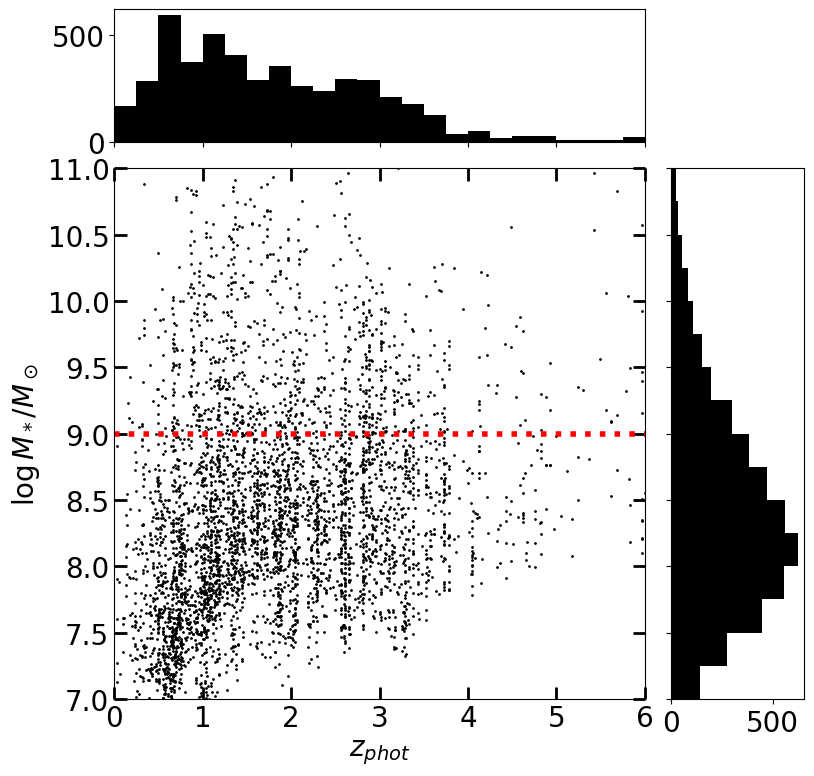

In [151]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=1,color='black')

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(-lim_x[0], lim_x[1] + binwidth, binwidth)
    bins_y= np.arange(-lim_y[0], lim_y[1] + binwidth, binwidth)
    ax_histx.hist(x, bins=bins_x,color='black')
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color='black')



fig = plt.figure()
fig.set_size_inches(8.5, 8.5)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.tick_params(axis='both', which='major', width = 2, length = 9, direction='in', top = 1, right = 1)
plt.xlim(0,6)
plt.ylim(7,11)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel("$z_{phot}$",fontsize=20)
plt.ylabel("$\log M_*/M_\odot$",fontsize=20)
#ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
z = jades['z'].values
mass = jades['mass'].values
#star_flag=jades_cat.star_flag
sel = jades
scatter_hist(sel.z, sel.mass, ax, ax_histx, ax_histy,[0,6],[7,11])
plt.axhline(y=9,color='red',lw=4,ls=':')



#plt.scatter(cosmos_cat.rb_z,cosmos_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
#plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

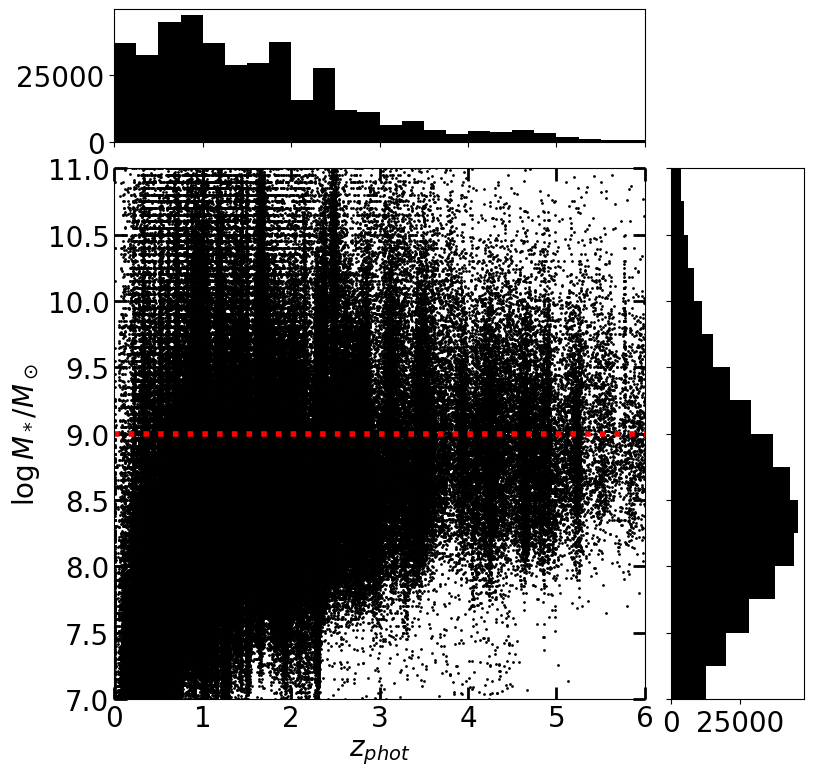

In [153]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=1,color='black')

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(-lim_x[0], lim_x[1] + binwidth, binwidth)
    bins_y= np.arange(-lim_y[0], lim_y[1] + binwidth, binwidth)
    ax_histx.hist(x, bins=bins_x,color='black')
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color='black')



fig = plt.figure()
fig.set_size_inches(8.5, 8.5)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.tick_params(axis='both', which='major', width = 2, length = 9, direction='in', top = 1, right = 1)
plt.xlim(0,6)
plt.ylim(7,11)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel("$z_{phot}$",fontsize=20)
plt.ylabel("$\log M_*/M_\odot$",fontsize=20)
#ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
z = cosmos['LP_zPDF'].values
mass = cosmos['LP_mass_med_PDF'].values
#star_flag=jades_cat.star_flag
sel = cosmos
scatter_hist(z, mass, ax, ax_histx, ax_histy,[0,6],[7,11])
plt.axhline(y=9,color='red',lw=4,ls=':')



#plt.scatter(cosmos_cat.rb_z,cosmos_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
#plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

In [ ]:
#cosmos["F200_AB"] = 2.5*(23-np.log10(ceers_cat.FLUX_200*1e-9))-48.6

# Define your data
zfit_50 = cosmos['LP_zPDF'].values
cosmos['mlim'] = cosmos['LP_mass_med_PDF'].values + 0.4 * (cosmos['MAG_MODEL_F150W'].values - 27)

# Create bins with a size of 0.3
bin_size = 0.3
zbins = np.arange(0, 6 + bin_size, bin_size)

# Use digitize to get the bin indices for each data point
#bin_indices = np.digitize(zfit_50, bins)

# Initialize an array to store the 90th percentile values
percentile_90_values = []

# Iterate through each bin and calculate the 90th percentile value of mlim
for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    sel = cosmos.query("mlim >0 and LP_zPDF>"+str(zlow)+"and LP_zPDF<"+str(zup))
    print(zlow,zup,len(sel))
    if len(sel) > 0:
        print('good')
        percentile_90 = np.percentile(sel['mlim'].values, 10)
        percentile_90_values.append(percentile_90)
    else:
        print('bad')
        percentile_90_values.append(np.nan)



In [ ]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y,color='black',size=1,label='All'):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=size,color=color,label=label)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(-lim_x[0], lim_x[1] + binwidth, binwidth)
    bins_y= np.arange(-lim_y[0], lim_y[1] + binwidth, binwidth)
    ax_histx.hist(x, bins=bins_x,color=color)
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color=color)



fig = plt.figure()
fig.set_size_inches(8.5, 8.5)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.tick_params(axis='both', which='major', width = 2, length = 9, direction='in', top = 1, right = 1)
plt.xlim(0,6)
plt.ylim(7,11)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel("$z_{phot}$",fontsize=20)
plt.ylabel("$\log M_*/M_\odot$",fontsize=20)
#ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
z = cosmos['LP_zPDF'].values
mass = cosmos['LP_mass_med_PDF'].values
#star_flag=ceers_cat.star_flag
sel = cosmos
scatter_hist(sel.zfit_50, sel.logM_50, ax, ax_histx, ax_histy,[0,6],[7,11],color='black')

plt.axhline(y=9,color='red',lw=4,ls=':')
plt.legend(loc='lower right',fontsize=20)
plt.plot(zbins[:-1],percentile_90_values,linewidth=3)
#plt.plot(zbins[:-1],percentile_90_values_Q,linewidth=3,color='red')
plt.savefig(data_path+"mass_z_comp_CWEB.png",bbox_inches='tight')


#plt.scatter(ceers_cat.rb_z,ceers_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
#plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

ValueError: cannot convert float NaN to integer

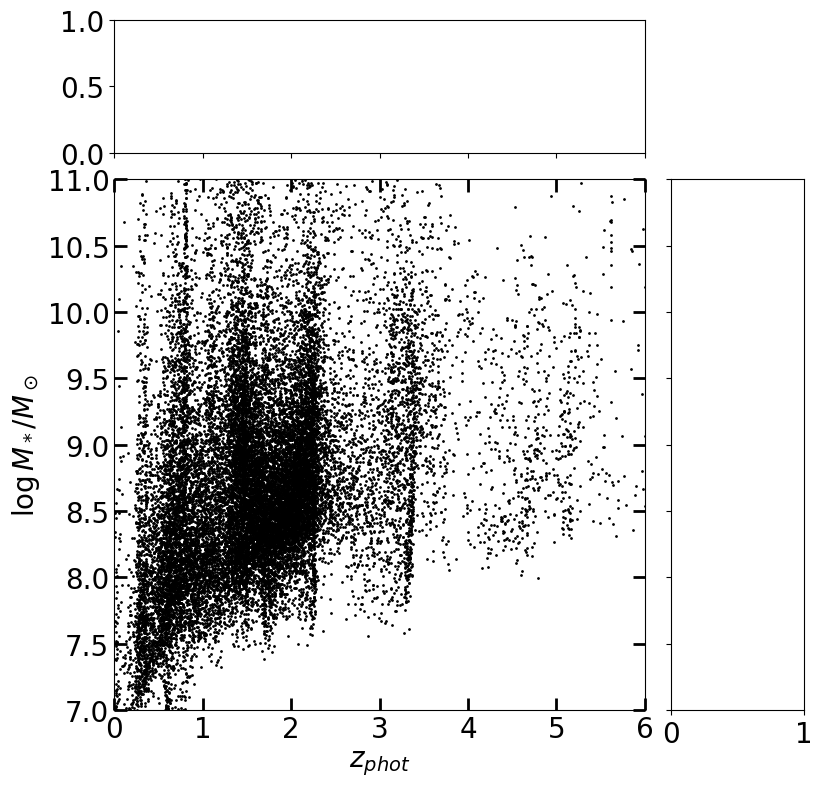

In [130]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=1,color='black')

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(-lim_x[0], lim_x[1] + binwidth, binwidth)
    bins_y= np.arange(-lim_y[0], lim_y[1] + binwidth, binwidth)
    ax_histx.hist(x, bins=bins_x,color='black')
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color='black')



fig = plt.figure()
fig.set_size_inches(8.5, 8.5)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.tick_params(axis='both', which='major', width = 2, length = 9, direction='in', top = 1, right = 1)
plt.xlim(0,6)
plt.ylim(7,11)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel("$z_{phot}$",fontsize=20)
plt.ylabel("$\log M_*/M_\odot$",fontsize=20)
#ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
z = ceers['zfit_50'].values
mass = ceers['logM_50'].values
#star_flag=jades_cat.star_flag
sel = ceers
scatter_hist(z, mass, ax, ax_histx, ax_histy,[0,6],[7,11])
plt.axhline(y=9,color='red',lw=4,ls=':')



#plt.scatter(cosmos_cat.rb_z,cosmos_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
#plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

In [131]:
#cosmos_cat["F200_AB"] = 2.5*(23-np.log10(cosmos_cat.FLUX_200*1e-9))-48.6
jades["F200_AB"] = -2.5*(np.log10(jades.F200W_CIRC0*1e-9))+8.90

# Define your data
zfit_50 = jades['z'].values
jades['mlim'] = jades['mass'].values + 0.4 * (jades['F200_AB'].values - 27)

# Create bins with a size of 0.3
bin_size = 0.3
zbins = np.arange(0, 6 + bin_size, bin_size)

# Use digitize to get the bin indices for each data point
#bin_indices = np.digitize(zfit_50, bins)

# Initialize an array to store the 90th percentile values
percentile_90_values = []

# Iterate through each bin and calculate the 90th percentile value of mlim
for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    sel = jades.query("mlim >0 and z>"+str(zlow)+"and z<"+str(zup))
    print(zlow,zup,len(sel))
    if len(sel) > 0:
        print('good')
        percentile_90 = np.percentile(sel['mlim'].values, 10)
        percentile_90_values.append(percentile_90)
    else:
        print('bad')
        percentile_90_values.append(np.nan)

percentile_90_values_Q = []



0.0 0.3 233
good
0.3 0.6 410
good
0.6 0.8999999999999999 584
good
0.8999999999999999 1.2 595
good
1.2 1.5 450
good
1.5 1.7999999999999998 329
good
1.7999999999999998 2.1 474
good
2.1 2.4 261
good
2.4 2.6999999999999997 322
good
2.6999999999999997 3.0 301
good
3.0 3.3 266
good
3.3 3.5999999999999996 147
good
3.5999999999999996 3.9 110
good
3.9 4.2 46
good
4.2 4.5 24
good
4.5 4.8 31
good
4.8 5.1 20
good
5.1 5.3999999999999995 8
good
5.3999999999999995 5.7 13
good
5.7 6.0 20
good


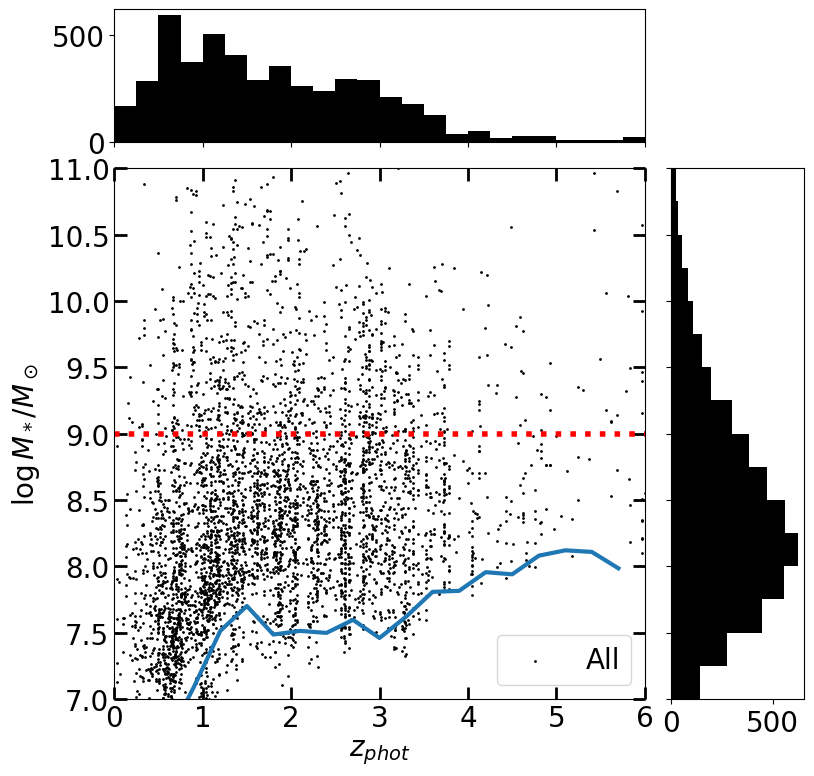

In [132]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y,color='black',size=1,label='All'):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=size,color=color,label=label)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(-lim_x[0], lim_x[1] + binwidth, binwidth)
    bins_y= np.arange(-lim_y[0], lim_y[1] + binwidth, binwidth)
    ax_histx.hist(x, bins=bins_x,color=color)
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color=color)



fig = plt.figure()
fig.set_size_inches(8.5, 8.5)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.tick_params(axis='both', which='major', width = 2, length = 9, direction='in', top = 1, right = 1)
plt.xlim(0,6)
plt.ylim(7,11)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel("$z_{phot}$",fontsize=20)
plt.ylabel("$\log M_*/M_\odot$",fontsize=20)
#ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
z = jades['z'].values
mass = jades['mass'].values
#star_flag=jades_cat.star_flag
sel = jades # .query('FLAG_STAR_JWST==0')
scatter_hist(sel.z, sel.mass, ax, ax_histx, ax_histy,[0,6],[7,11],color='black')
#sel_Q = cosmos_cat.query('star_flag==0 and timescale<1/20')
#scatter_hist(sel_Q.zfit_50, sel_Q.logM_50, ax, ax_histx, ax_histy,[0,6],[7,11],color='red',size=4,label='Quiescent')
plt.axhline(y=9,color='red',lw=4,ls=':')
plt.legend(loc='lower right',fontsize=20)
plt.plot(zbins[:-1],percentile_90_values,linewidth=3)
#plt.plot(zbins[:-1],percentile_90_values_Q,linewidth=3,color='red')
#plt.savefig(data_path+"mass_z_comp.png",bbox_inches='tight')


#plt.scatter(cosmos_cat.rb_z,cosmos_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
#plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

In [133]:
ceers["F200_AB"] = 2.5*(23-np.log10(ceers.FLUX_200*1e-9))-48.6

# Define your data
zfit_50 = ceers['zfit_50'].values
ceers['mlim'] = ceers['logM_50'].values + 0.4 * (ceers['F200_AB'].values - 27)

# Create bins with a size of 0.3
bin_size = 0.3
zbins = np.arange(0, 6 + bin_size, bin_size)

# Use digitize to get the bin indices for each data point
#bin_indices = np.digitize(zfit_50, bins)

# Initialize an array to store the 90th percentile values
percentile_90_values = []

# Iterate through each bin and calculate the 90th percentile value of mlim
for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    sel = ceers.query("mlim >0 and zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))
    print(zlow,zup,len(sel))
    if len(sel) > 0:
        print('good')
        percentile_90 = np.percentile(sel['mlim'].values, 10)
        percentile_90_values.append(percentile_90)
    else:
        print('bad')
        percentile_90_values.append(np.nan)

percentile_90_values_Q = []

# Iterate through each bin and calculate the 90th percentile value of mlim
#for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
#    sel = ceers.query("star_flag==0 and timescale <1/20 and mlim >0 and zfit_50>"+str(zlow)+"and zfit_50<"+str(zup))
#    print(zlow,zup,len(sel))
#    if len(sel) > 0:
#        print('good')
#        percentile_90 = np.percentile(sel['mlim'].values, 10)
#        percentile_90_values_Q.append(percentile_90)
#    else:
#        print('bad')
#        percentile_90_values_Q.append(np.nan)        

# Now, percentile_90_values contains the 90th percentile values for each bin

0.0 0.3 696
good
0.3 0.6 1779
good
0.6 0.8999999999999999 2930
good
0.8999999999999999 1.2 1957
good
1.2 1.5 3424
good
1.5 1.7999999999999998 3530
good
1.7999999999999998 2.1 3349
good
2.1 2.4 2986
good
2.4 2.6999999999999997 592
good
2.6999999999999997 3.0 447
good
3.0 3.3 715
good
3.3 3.5999999999999996 675
good
3.5999999999999996 3.9 170
good
3.9 4.2 88
good
4.2 4.5 114
good
4.5 4.8 196
good
4.8 5.1 116
good
5.1 5.3999999999999995 125
good
5.3999999999999995 5.7 58
good
5.7 6.0 26
good


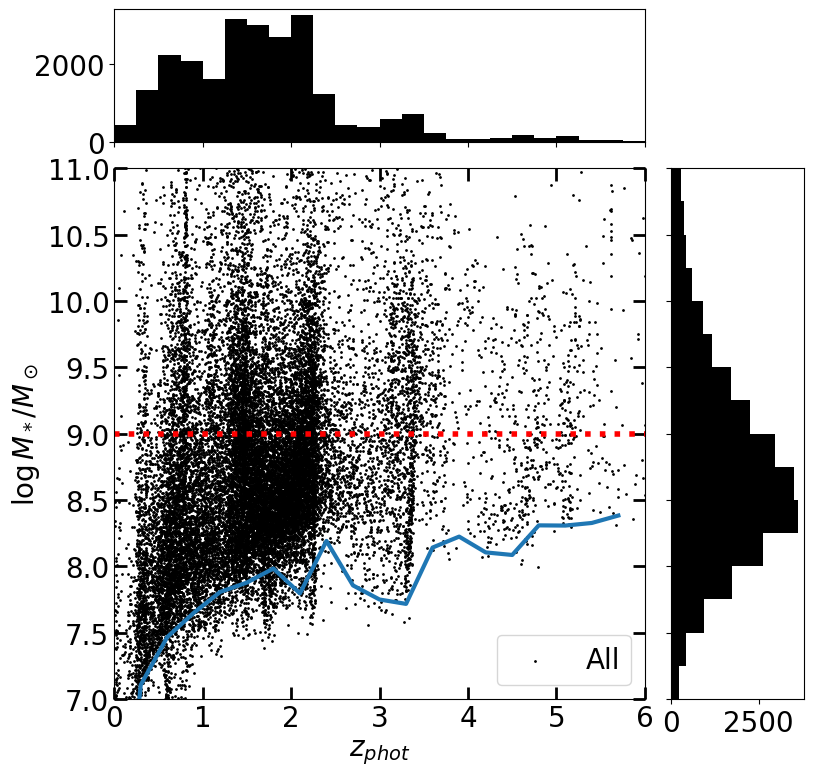

In [134]:
def scatter_hist(x, y, ax, ax_histx, ax_histy,lim_x,lim_y,color='black',size=1,label='All'):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histx.tick_params(axis='y', labelsize=20)
    ax_histy.tick_params(axis='x', labelsize=20)

    # the scatter plot:
    ax.scatter(x, y,s=size,color=color,label=label)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins_x= np.arange(-lim_x[0], lim_x[1] + binwidth, binwidth)
    bins_y= np.arange(-lim_y[0], lim_y[1] + binwidth, binwidth)
    ax_histx.hist(x, bins=bins_x,color=color)
    ax_histy.hist(y, bins=bins_y, orientation='horizontal',color=color)



fig = plt.figure()
fig.set_size_inches(8.5, 8.5)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax.tick_params(axis='both', which='major', width = 2, length = 9, direction='in', top = 1, right = 1)
plt.xlim(0,6)
plt.ylim(7,11)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel("$z_{phot}$",fontsize=20)
plt.ylabel("$\log M_*/M_\odot$",fontsize=20)
#ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
#ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.25, 1], sharey=ax)
# Draw the scatter plot and marginals.
z = ceers['zfit_50'].values
mass = ceers['logM_50'].values
#star_flag=ceers_cat.star_flag
sel = ceers
scatter_hist(sel.zfit_50, sel.logM_50, ax, ax_histx, ax_histy,[0,6],[7,11],color='black')
#sel_Q = ceers_cat.query('star_flag==0 and timescale<1/20')
#scatter_hist(sel_Q.zfit_50, sel_Q.logM_50, ax, ax_histx, ax_histy,[0,6],[7,11],color='red',size=4,label='Quiescent')
plt.axhline(y=9,color='red',lw=4,ls=':')
plt.legend(loc='lower right',fontsize=20)
plt.plot(zbins[:-1],percentile_90_values,linewidth=3)
#plt.plot(zbins[:-1],percentile_90_values_Q,linewidth=3,color='red')
#plt.savefig(data_path+"mass_z_comp.png",bbox_inches='tight')


#plt.scatter(ceers_cat.rb_z,ceers_cat.rb_synth_Mass_me_solar_exp,s=1,color='black')
#plt.tight_layout()
#plt.savefig(data_path+"mass_z.png",bbox_inches='tight')

{0}
11414
{3}
6451
{1}
25768
{2}
132242


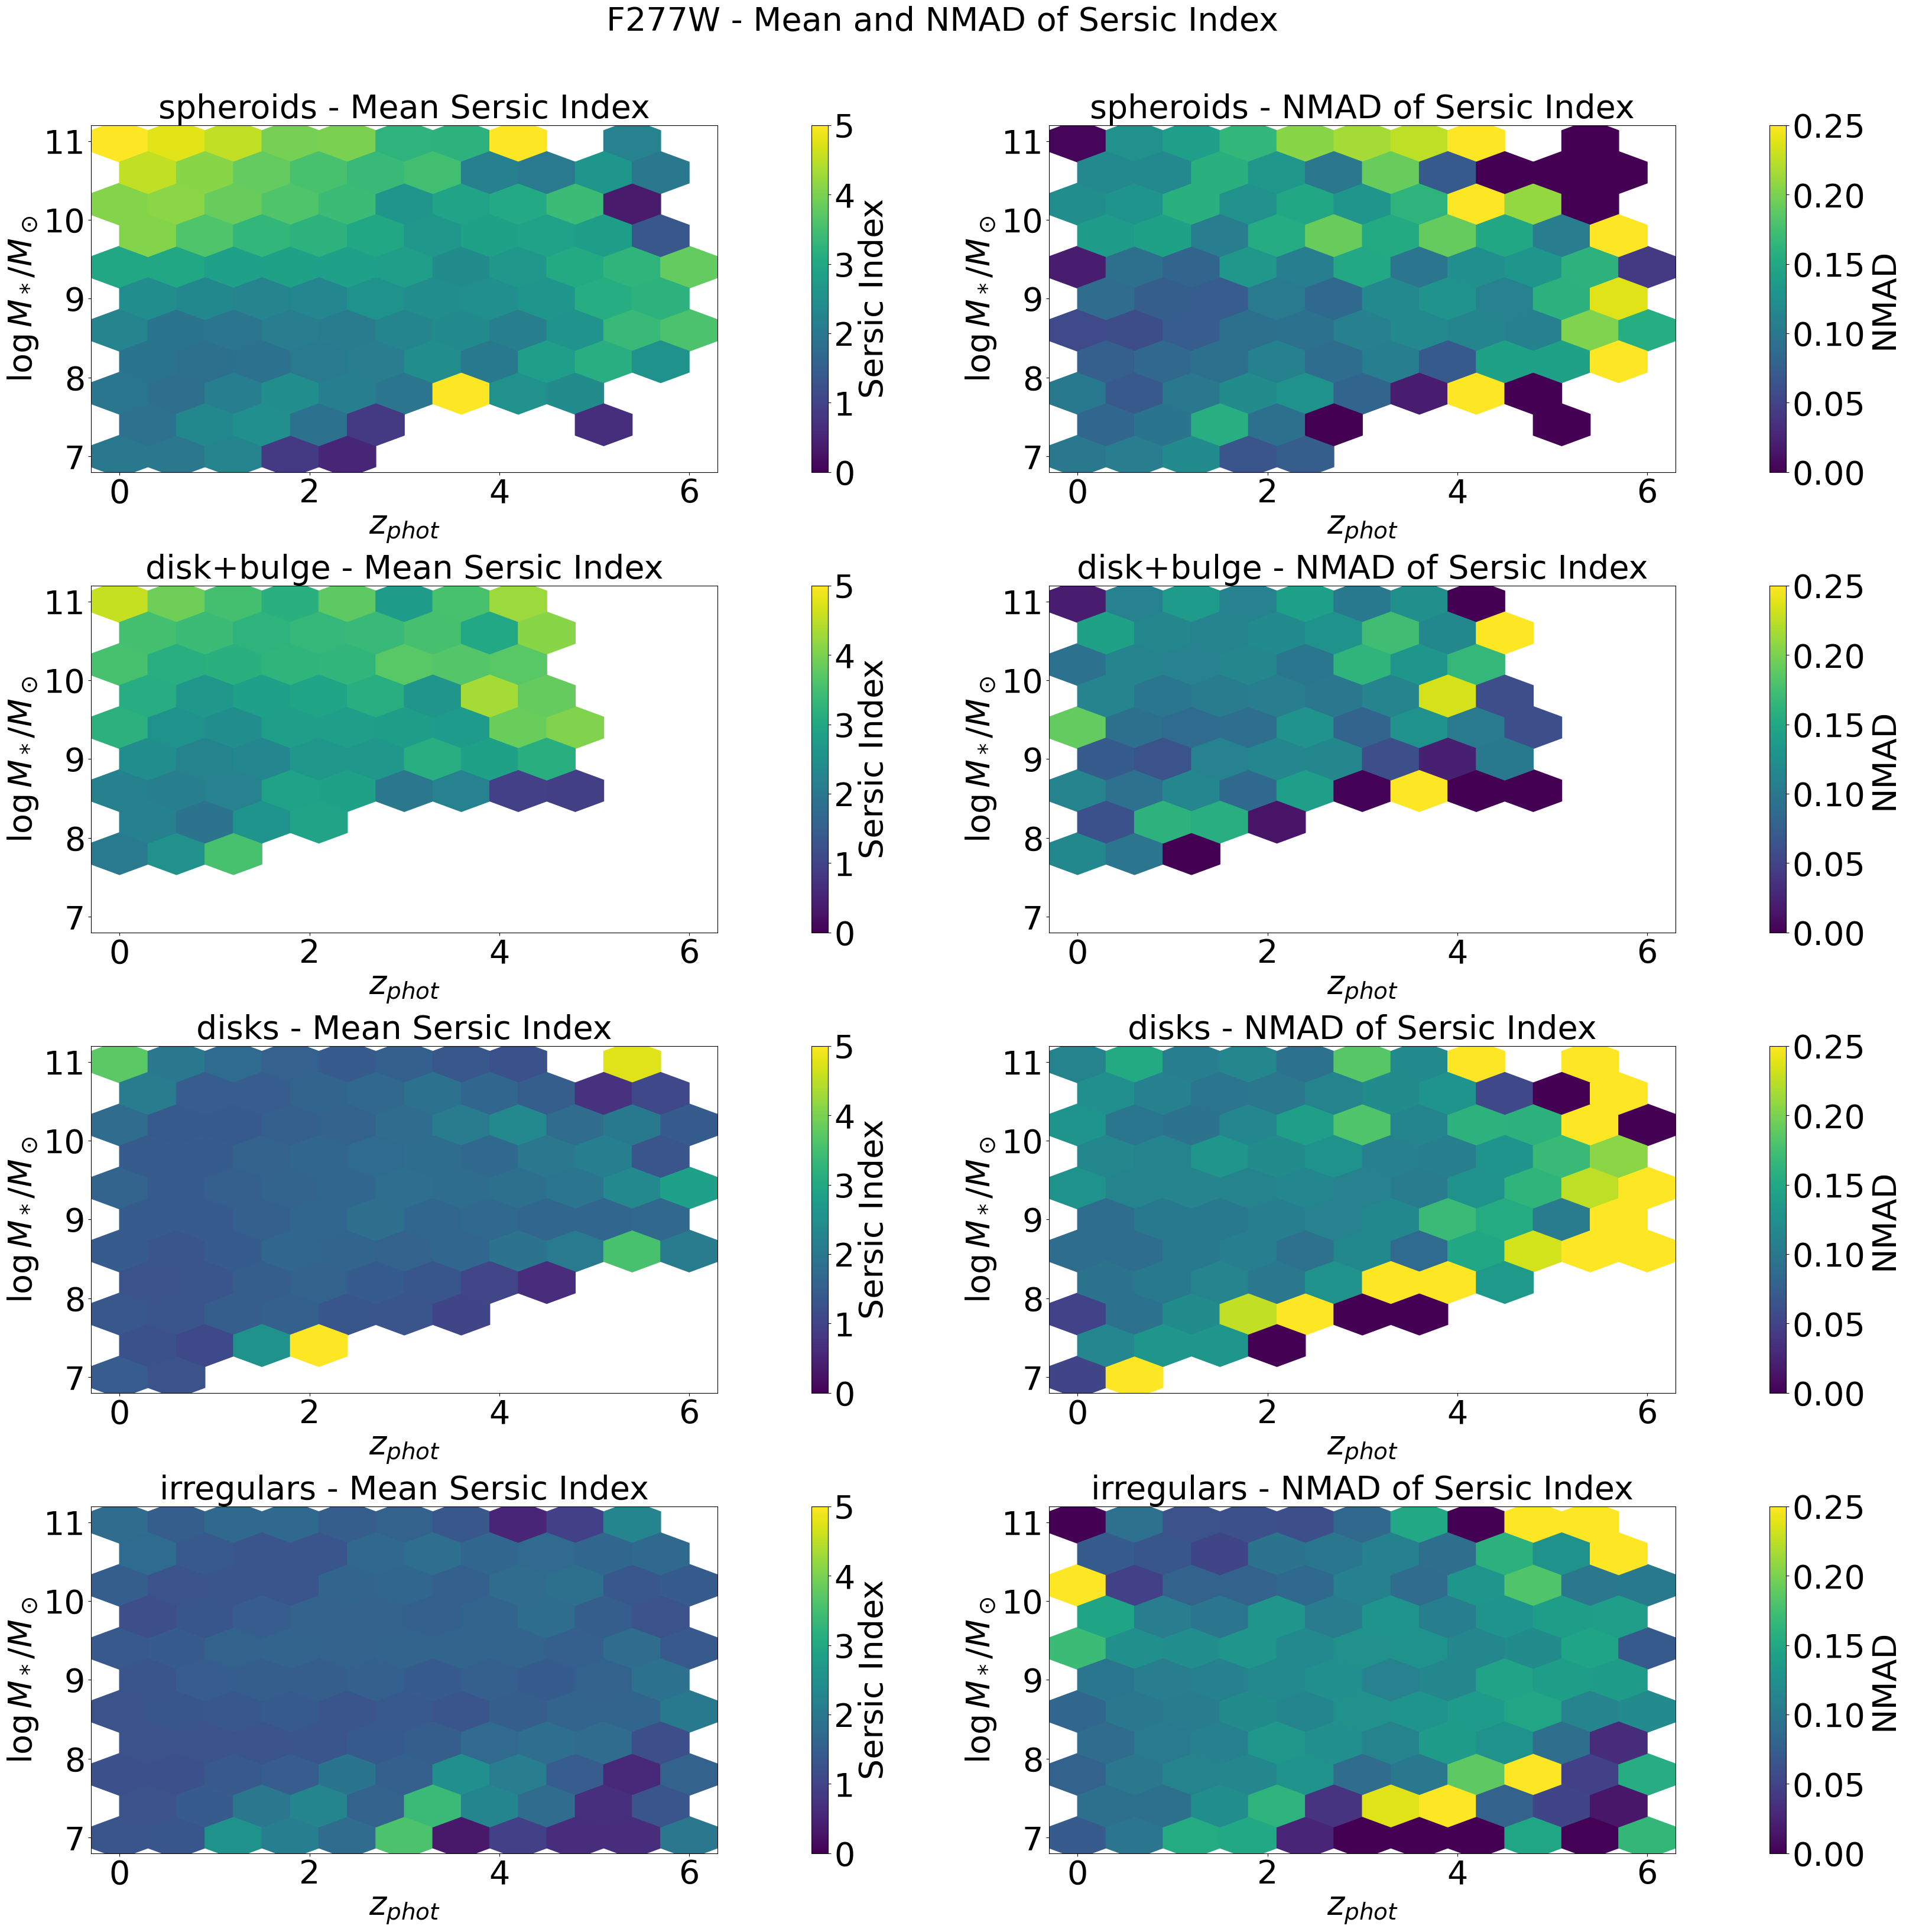

{0}
21843
{3}
7938
{1}
24653
{2}
121441


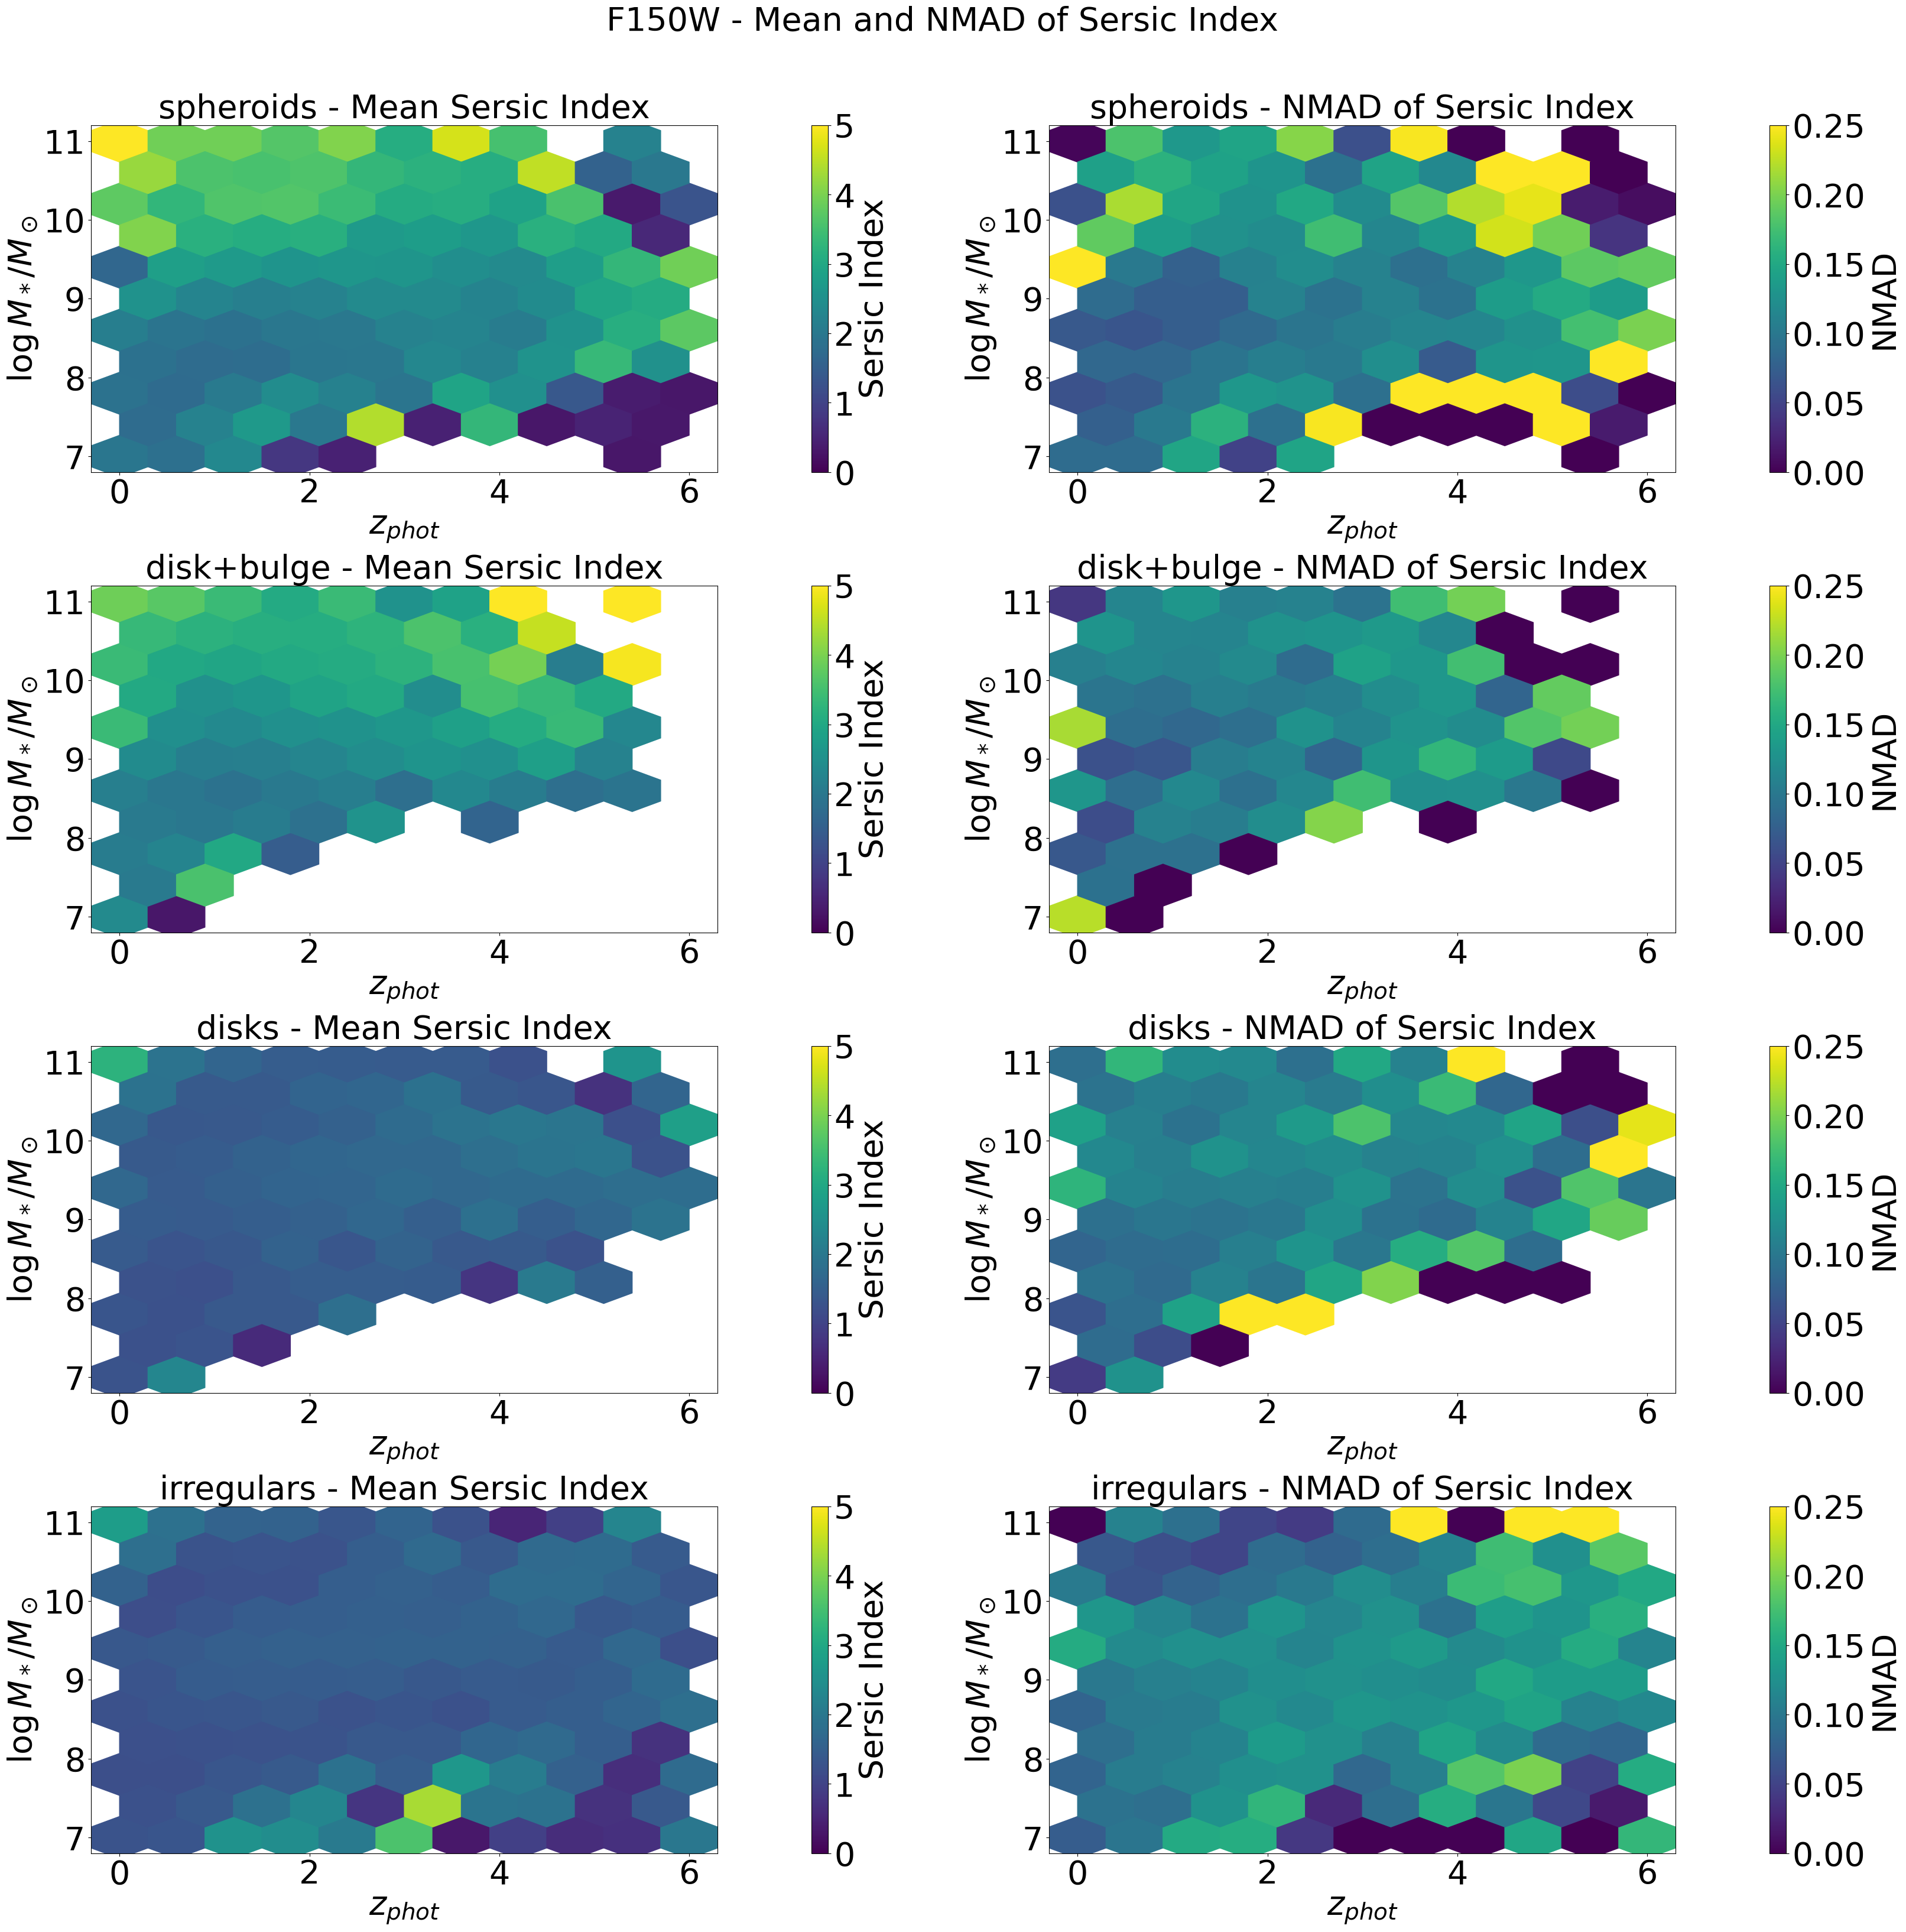

{0}
19685
{3}
8505
{1}
24203
{2}
123482


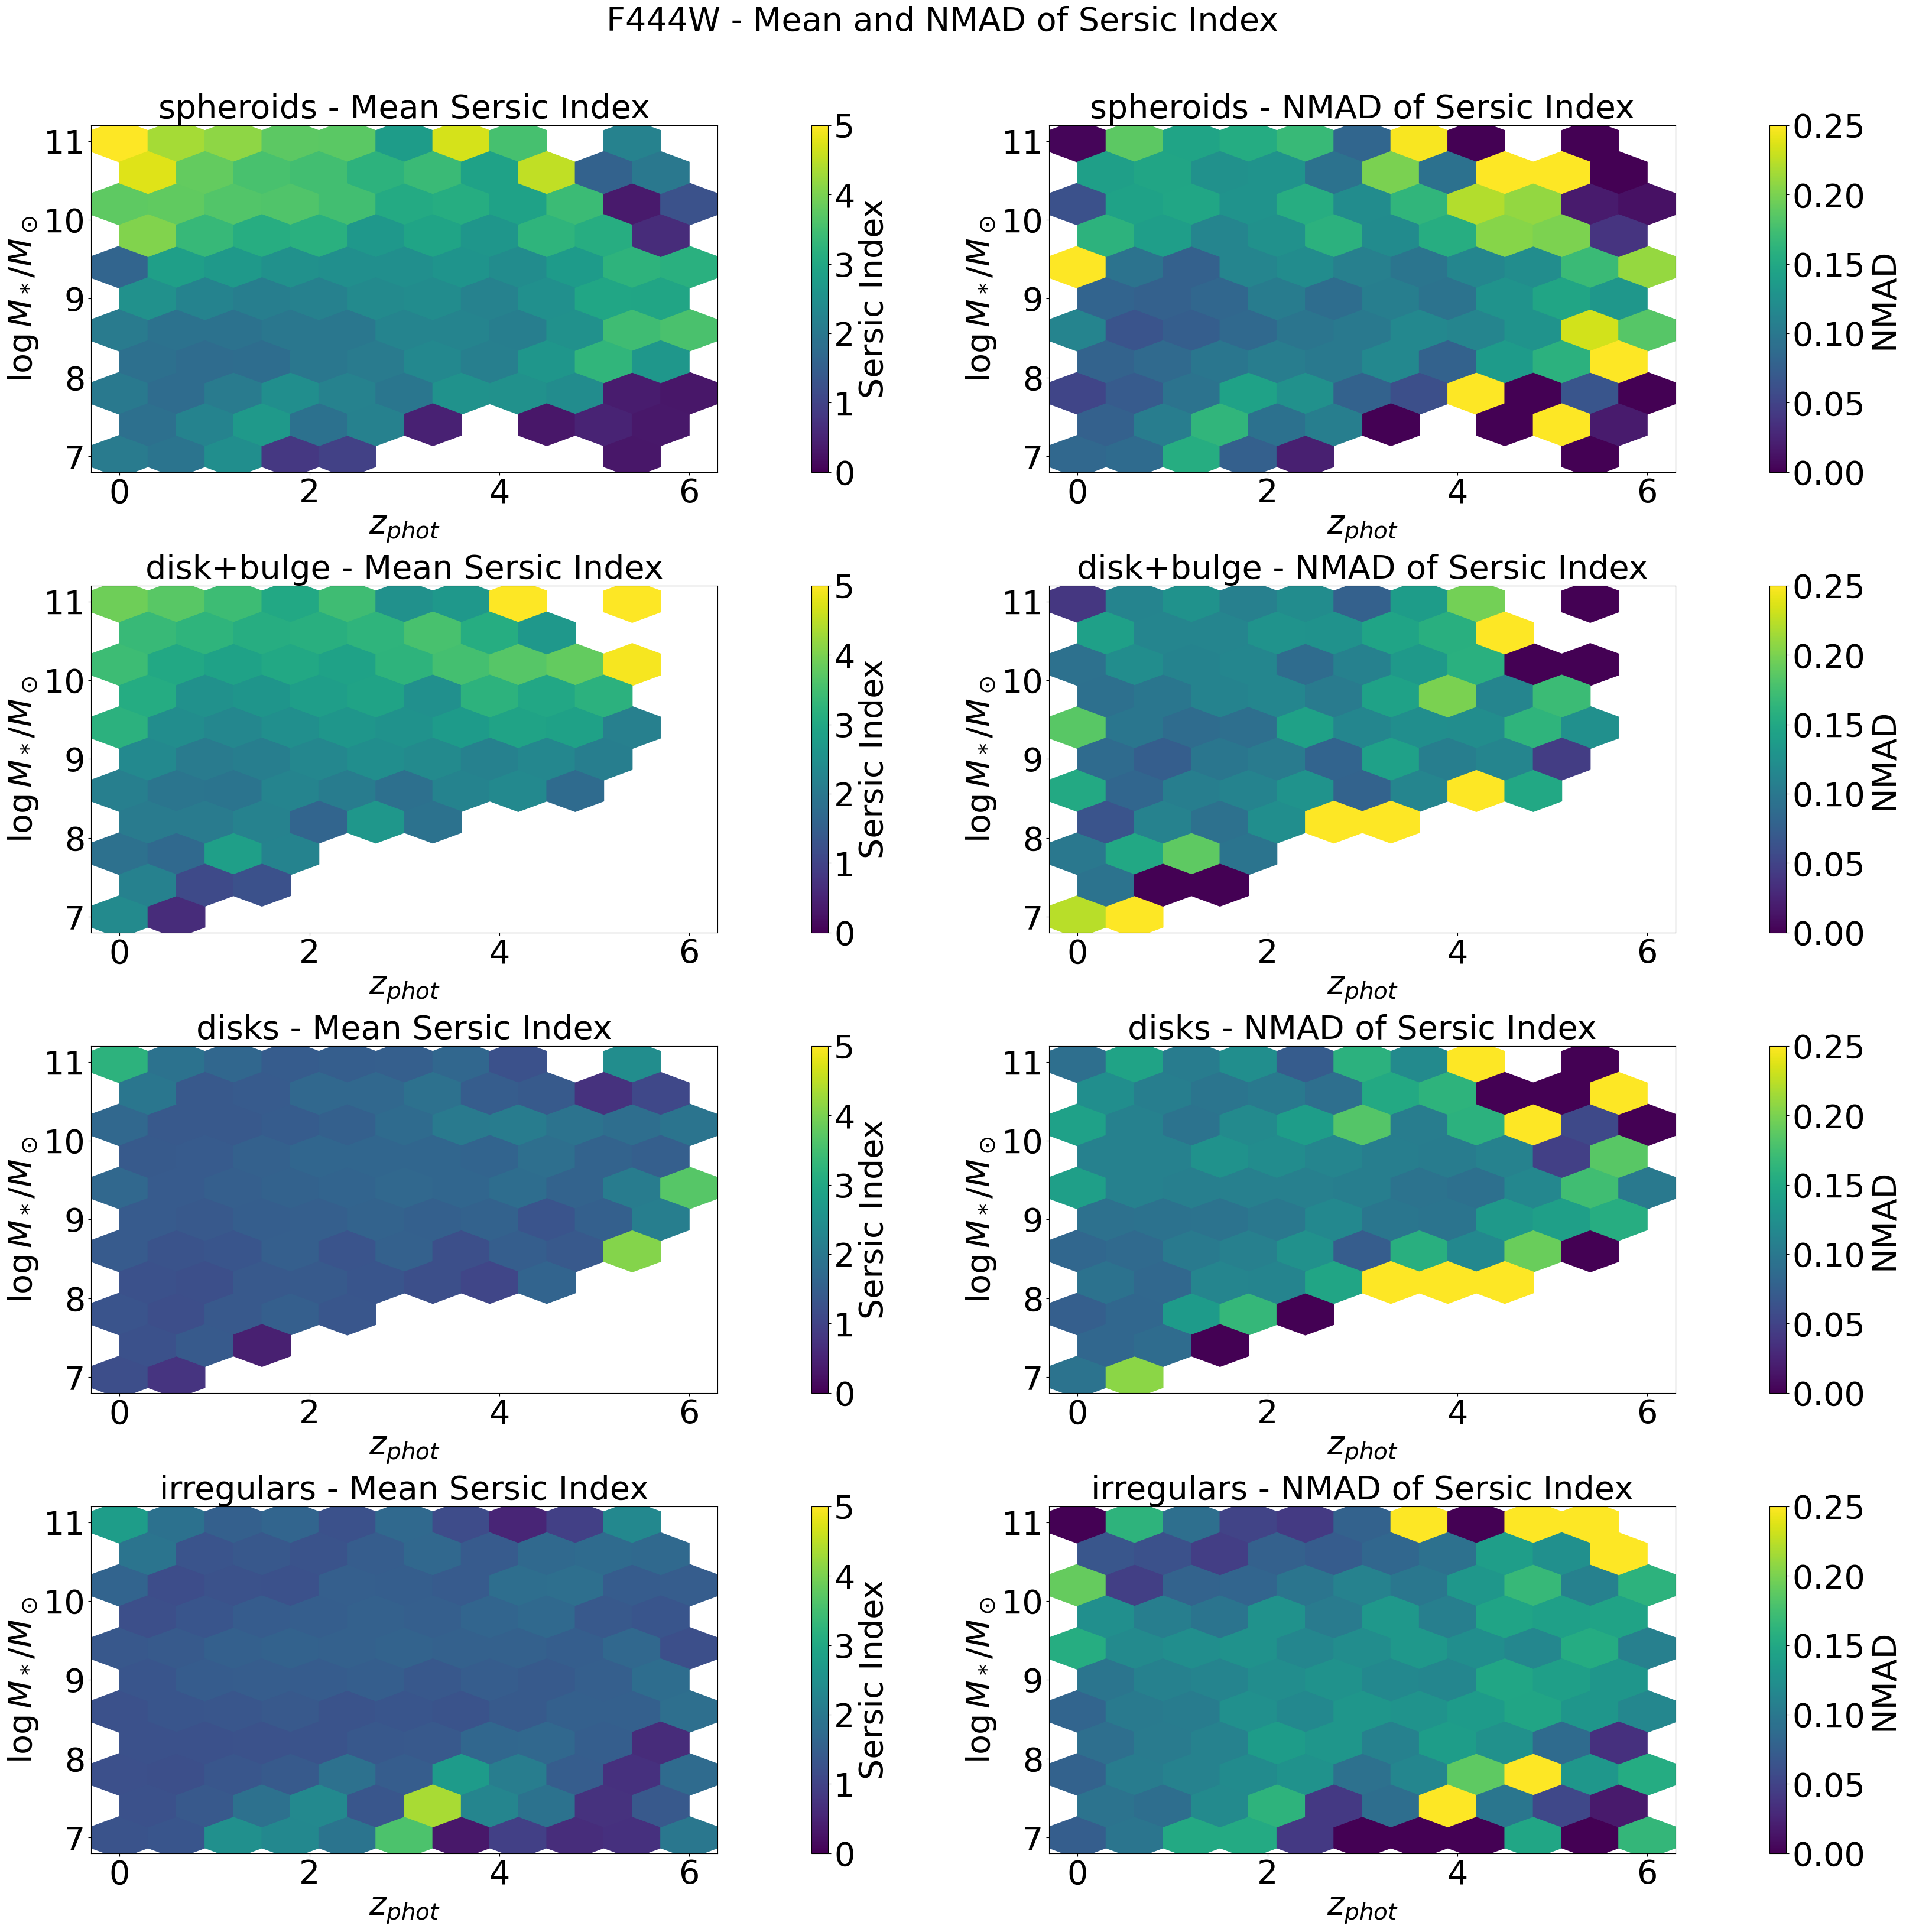

In [32]:
## we need morphologies in JADES....

import matplotlib.gridspec as gridspec
import os


def nmad(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    scale_factor = np.percentile(data, 98)
    nmad_value = mad / scale_factor
    return nmad_value

# Create a list of morph_flag_f200w values to loop through
morph_flag_f200w_values = [0, 3, 1, 2]

# Set up colors for each morph_flag_f200w value
colors = ['red', 'orange', 'blue', 'green', ]

# Labels for the legend
legend_labels = ["spheroids", "disk+bulge", "disks", "irregulars" ]


# Function to generate and save the hexbin plot for each morphological class
def generate_hexbin_plots(data_path, min_count=5):
    n_f200_columns = ['SERSIC', 'SERSIC', 'SERSIC']
    flags = ['F200W', 'F356W', 'F444W']
    morph_wls = ['f200w', 'f356w', 'f444w']
    
    for n_f200_column, flag, morph_wl in zip(n_f200_columns, flags, morph_wls):
        fig = plt.figure(figsize=(32, 32))
        gs = gridspec.GridSpec(len(legend_labels), 5, width_ratios=[19, 0.5, 1, 19, 0.5])

        fig.suptitle(f"{flag} - Mean and NMAD of Sersic Index", fontsize=40, y=1.02)

        for i, (morph_label, morph_color) in enumerate(zip(legend_labels, colors)):
            # Query the data for the current morphological class and n_f200 column
            sel = jades_cat.query(f"morph_flag_{morph_wl}=={morph_flag_f200w_values[legend_labels.index(morph_label)]} and {n_f200_column}>0 and {n_f200_column}<8")
            print({morph_flag_f200w_values[legend_labels.index(morph_label)]})
            print(len(sel))
            n_f200 = sel[n_f200_column]
            mass = sel.LP_mass_med_PDF
            z = sel.LP_zPDF

            # Compute the hexbin counts to determine bins with enough objects
            counts, xedges, yedges = np.histogram2d(z, mass, bins=10, range=[[0, 6], [7, 11]])

            # Find the indices of bins with counts above the minimum threshold
            indices = np.column_stack(np.where(counts >= min_count))

            # Filter out the data points in the selected bins using the indices
            n_f200_filtered = n_f200[np.isin(np.digitize(z, xedges) - 1, indices[:, 0]) & np.isin(np.digitize(mass, yedges) - 1, indices[:, 1])]
            mass_filtered = mass[np.isin(np.digitize(z, xedges) - 1, indices[:, 0]) & np.isin(np.digitize(mass, yedges) - 1, indices[:, 1])]
            z_filtered = z[np.isin(np.digitize(z, xedges) - 1, indices[:, 0]) & np.isin(np.digitize(mass, yedges) - 1, indices[:, 1])]

            # Create hexbin plot for mean F356W_N, F200W_N, or F444W_N based on n_f200_column
            ax_mean = plt.subplot(gs[i, 0])
            cb_mean = ax_mean.hexbin(z_filtered, mass_filtered, C=n_f200_filtered, gridsize=10, cmap='viridis', vmin=0, vmax=5, reduce_C_function=np.mean, extent=[0, 6, 7, 11])
            ax_mean.set_ylabel("$\log M_*/M_\odot$", fontsize=40)
            ax_mean.set_xlabel("$z_{phot}$", fontsize=40)
            ax_mean.tick_params(axis='both', which='major', labelsize=40)
            ax_mean.set_title(f"{morph_label} - Mean Sersic Index", fontsize=40)

            ax_mean.get_xaxis().set_visible(True)
            ax_mean.get_yaxis().set_visible(True)

            ax_cb_mean = plt.subplot(gs[i, 1])
            cbar_mean = plt.colorbar(cb_mean, cax=ax_cb_mean, label="$F356W\_N$")
            cbar_mean.set_label('Sersic Index', fontsize=40)
            cbar_mean.ax.tick_params(labelsize=40)

            # Create hexbin plot for NMAD F356W_N, F200W_N, or F444W_N based on n_f200_column
            ax_std = plt.subplot(gs[i, 3])
            cb_std = ax_std.hexbin(z_filtered, mass_filtered, C=n_f200_filtered, gridsize=10, cmap='viridis', vmin=0, vmax=0.25, reduce_C_function=nmad, extent=[0, 6, 7, 11])
            ax_std.set_ylabel("$\log M_*/M_\odot$", fontsize=40)
            ax_std.set_xlabel("$z_{phot}$", fontsize=40)
            ax_std.tick_params(axis='both', which='major', labelsize=40)
            ax_std.set_title(f"{morph_label} - NMAD of Sersic Index", fontsize=40)

            ax_std.get_xaxis().set_visible(True)
            ax_std.get_yaxis().set_visible(True)

            ax_cb_std = plt.subplot(gs[i, 4])
            cbar_std = plt.colorbar(cb_std, cax=ax_cb_std, label='NMAD')
            cbar_std.set_label('NMAD', fontsize=40)
            cbar_std.ax.tick_params(labelsize=40)

        
        plt.subplots_adjust(top=0.95, hspace=0.35, wspace=0.30)
        plt.tight_layout()

        # Save the figure
        plt.savefig(os.path.join(data_path, f"hexbin_{n_f200_column}_mean_std.png"),bbox_inches='tight')
        plt.show()
        plt.close()

# Set the path for storing the figures
#data_path = "/Users/marchuertascompany/Documents/data/cosmos/DenseBasis/"

# Generate hexbin plots for each morphological class, merging all logM_50 and zfit_50 bins
generate_hexbin_plots(data_path)


shape (141400,)
shape (261400,)
shape (70700,)


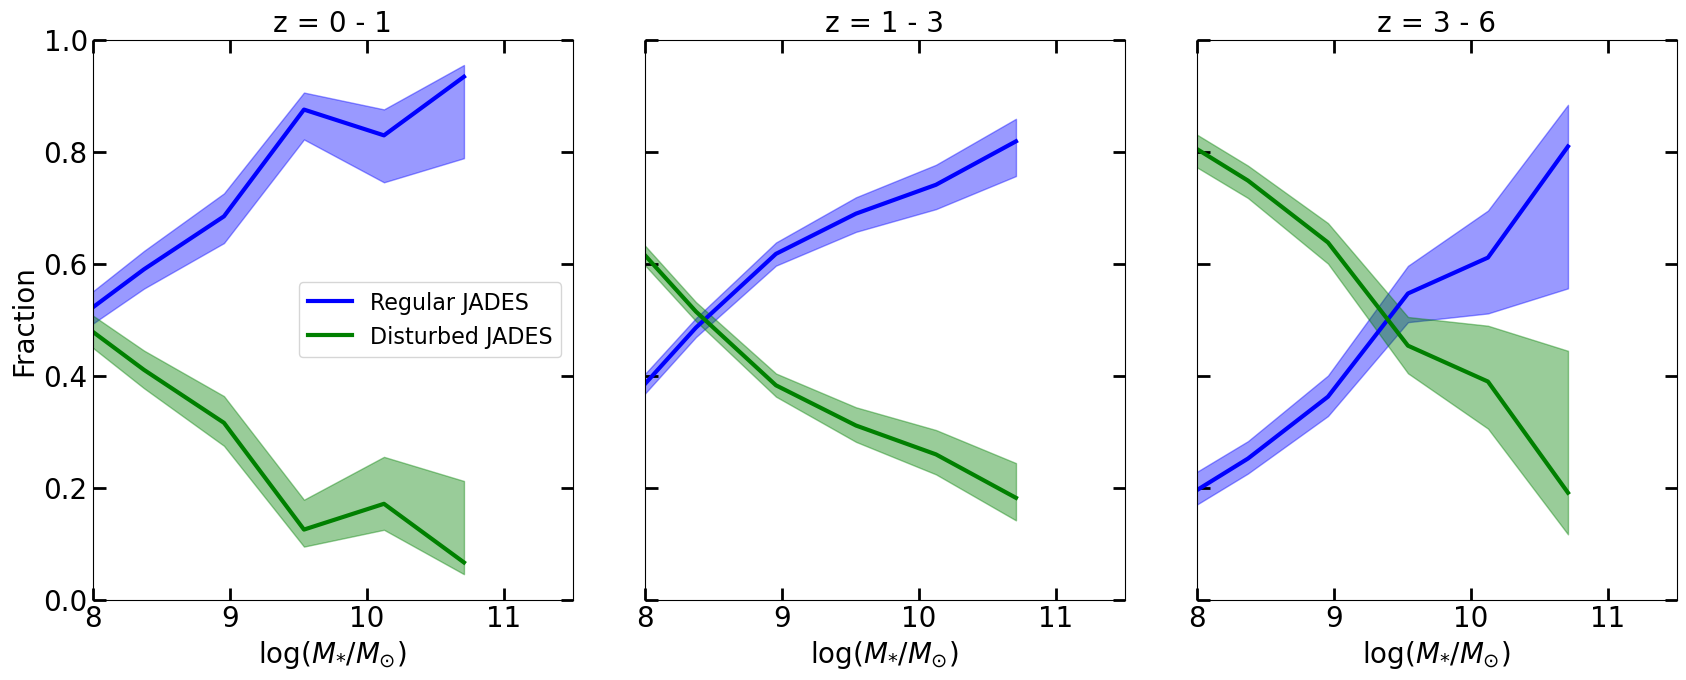

In [137]:
import matplotlib.pyplot as plt
import numpy as np

zbins = [0,1,3,6]

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 8))
fig.subplots_adjust(wspace=0.05)

for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    sel = jades.query("z > " + str(zlow) + " and z < " + str(zup))

    filters = ['f200w','f356w','f444w']
    morph = ['sph','disk','bd','irr']
    mass = sel['mass']
    logmstar_84 = sel['mass']+sel['err_ma']
    logmstar_16 = sel['mass']-sel['err_ma']
    zbest = sel['z']

    sample_data = {}  # Use a dictionary to store the morph_samples data
    morph_dict ={}
    for f in filters:
        
        for m in morph:
            morph_mean = sel[f'{m}_{f}_mean']
            morph_std = sel[f'{m}_{f}_std']
    
            morph_samples=[]
            mass_samples=[]
            zbest_samples =[]
            nsamples=100
            for k in range(nsamples):
                morph_samples.append(morph_mean+np.random.normal(size=len(morph_mean))*(morph_std))
                #mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
                mass_samples.append(mass)
                zbest_samples.append(zbest)
            #print("length:", len(mass_samples))    
            sample_data[(f, m)] = morph_samples

        morph_flag=[]
        
        

        for sph,dk,irr,bd in zip(np.concatenate(sample_data[(f, 'sph')]),np.concatenate(sample_data[(f, 'disk')]),np.concatenate(sample_data[(f, 'irr')]),np.concatenate(sample_data[(f, 'bd')])):
            maxpos = np.argmax([sph,dk,irr,bd])
            
            morph_flag.append(maxpos)
        morph_dict[f]=morph_flag
           



    flatten_mass = np.concatenate(mass_samples).ravel()
    flatten_z = np.concatenate(zbest_samples).ravel()
    morph_flag = np.array(morph_dict[('f200w')])
    print('shape',np.array(flatten_z).shape)
    

    morph_f356 = np.array(morph_dict['f356w'])
    morph_f444 = np.array(morph_dict['f444w'])
    morph_flag[(flatten_z>1) & (flatten_z<3)] = morph_f356[(flatten_z>1) & (flatten_z<3)]
    morph_flag[(flatten_z>3) & (flatten_z<6)]= morph_f444[(flatten_z>3) & (flatten_z<6)]

    axs[i].set_ylim(0, 1)
    axs[i].set_xlim(8, 11.5)
    axs[i].set_xticks(np.arange(8, 12))
    axs[i].tick_params(axis='both', which='major', labelsize=20)
    axs[i].set_xlabel(r'$\log(M_{*}/M_{\odot})$', fontsize=20)
    axs[i].set_title(f"z = {zlow} - {zup}", fontsize=20)
    axs[i].tick_params(axis='both', which='major', width = 2, length = 9, direction='in', top = 1, right = 1)

    axs[0].set_ylabel(r'Fraction', fontsize=20)


  


    all,bins = np.histogram(flatten_mass,range=(7.5,11),bins=6)
    sph,bins = np.histogram(flatten_mass[(morph_flag==0)|(morph_flag==3)| (morph_flag==1)],range=(7.5,11),bins=6)
    dk,bins = np.histogram(flatten_mass[(morph_flag==2)],range=(7.5,11),bins=6)

    bcenters = (bins[1:] + bins[:-1])/2

    axs[i].plot(bcenters,betaincinv(sph+1, all+1-sph, 0.5),color='blue',linewidth=3,label="Regular JADES")
    axs[i].fill_between(bcenters, betaincinv(sph/nsamples+1, all/nsamples+1-sph/nsamples, .16), betaincinv(sph/nsamples+1, all/nsamples+1-sph/nsamples, .84), color='blue', alpha=0.4)
    axs[i].plot(bcenters,betaincinv(dk+1, all+1-dk, 0.5),color='green',linewidth=3,label="Disturbed JADES")
    axs[i].fill_between(bcenters, betaincinv(dk/nsamples+1, all/nsamples+1-dk/nsamples, 0.16), betaincinv(dk/nsamples+1, all/nsamples+1-dk/nsamples, 0.84), color='green', alpha=0.4)
    axs[0].legend(fontsize=16)


    


plt.subplots_adjust(left=0.07, bottom=0.15, right=0.95, top=0.85, wspace=0.15, hspace=0.15)
#plt.savefig(data_path+"morph_frac_irr_resframe_multipanel_sample.png")

plt.show()

shape (604100,)
shape (1564900,)
shape (228300,)


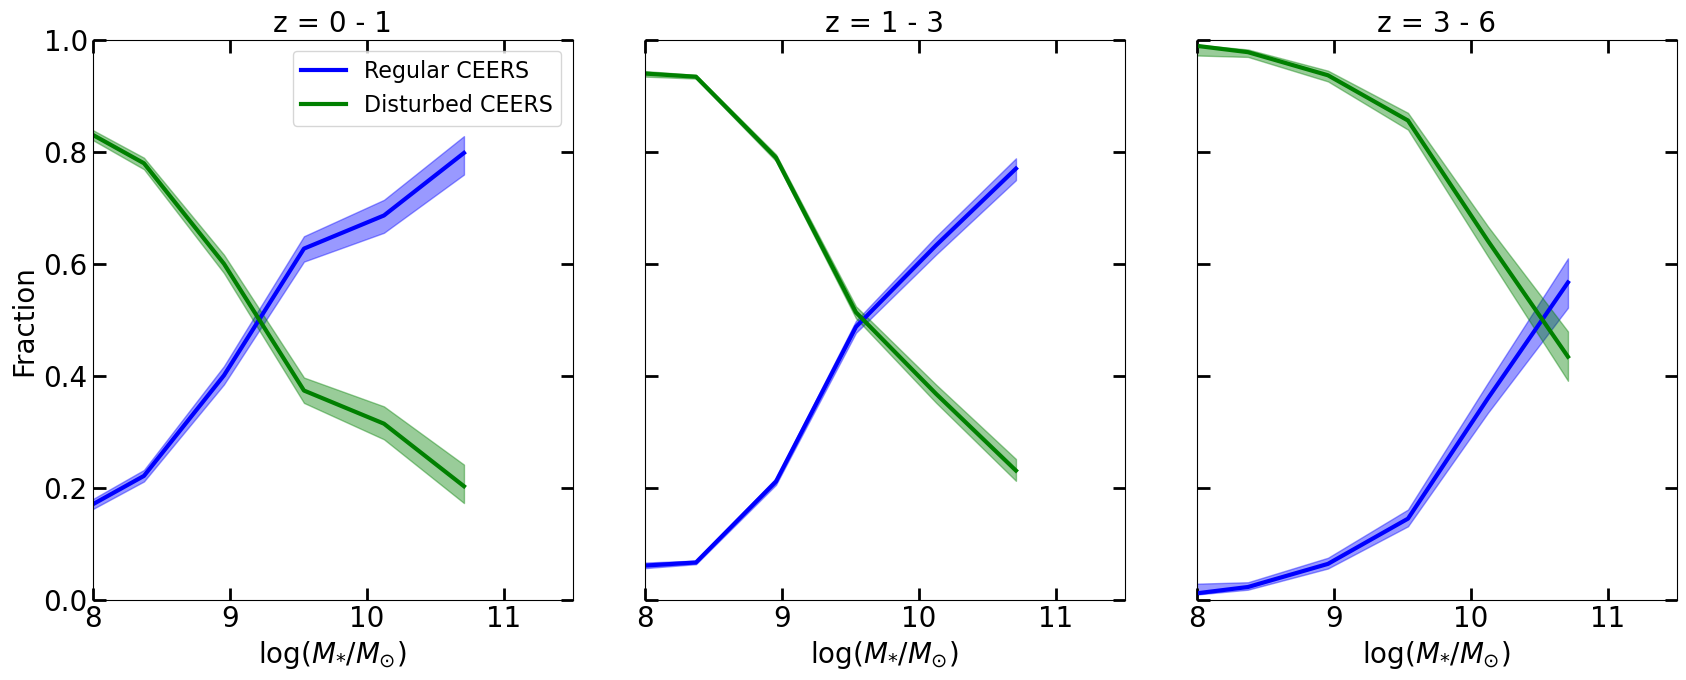

In [154]:
import matplotlib.pyplot as plt
import numpy as np

zbins = [0,1,3,6]

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 8))
fig.subplots_adjust(wspace=0.05)

for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    sel = ceers.query("zfit_50 > " + str(zlow) + " and zfit_50 < " + str(zup))

    filters = ['f200w','f356w','f444w']
    morph = ['sph','disk','bd','irr']
    mass = sel['logM_50']
    logmstar_84 = sel['logM_84']#+sel['err_ma']
    logmstar_16 = sel['logM_16']#-sel['err_ma']
    zbest = sel['zfit_50']

    sample_data = {}  # Use a dictionary to store the morph_samples data
    morph_dict ={}
    for f in filters:
        
        for m in morph:
            morph_mean = sel[f'{m}_{f}_mean']
            morph_std = sel[f'{m}_{f}_std']
    
            morph_samples=[]
            mass_samples=[]
            zbest_samples =[]
            nsamples=100
            for k in range(nsamples):
                morph_samples.append(morph_mean+np.random.normal(size=len(morph_mean))*(morph_std))
                #mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
                mass_samples.append(mass)
                zbest_samples.append(zbest)
            #print("length:", len(mass_samples))    
            sample_data[(f, m)] = morph_samples

        morph_flag=[]
        
        

        for sph,dk,irr,bd in zip(np.concatenate(sample_data[(f, 'sph')]),np.concatenate(sample_data[(f, 'disk')]),np.concatenate(sample_data[(f, 'irr')]),np.concatenate(sample_data[(f, 'bd')])):
            maxpos = np.argmax([sph,dk,irr,bd])
            
            morph_flag.append(maxpos)
        morph_dict[f]=morph_flag
           



    flatten_mass = np.concatenate(mass_samples).ravel()
    flatten_z = np.concatenate(zbest_samples).ravel()
    morph_flag = np.array(morph_dict[('f200w')])
    print('shape',np.array(flatten_z).shape)
    

    morph_f356 = np.array(morph_dict['f356w'])
    morph_f444 = np.array(morph_dict['f444w'])
    morph_flag[(flatten_z>1) & (flatten_z<3)] = morph_f356[(flatten_z>1) & (flatten_z<3)]
    morph_flag[(flatten_z>3) & (flatten_z<6)]= morph_f444[(flatten_z>3) & (flatten_z<6)]

    axs[i].set_ylim(0, 1)
    axs[i].set_xlim(8, 11.5)
    axs[i].set_xticks(np.arange(8, 12))
    axs[i].tick_params(axis='both', which='major', labelsize=20)
    axs[i].set_xlabel(r'$\log(M_{*}/M_{\odot})$', fontsize=20)
    axs[i].set_title(f"z = {zlow} - {zup}", fontsize=20)
    axs[i].tick_params(axis='both', which='major', width = 2, length = 9, direction='in', top = 1, right = 1)

    axs[0].set_ylabel(r'Fraction', fontsize=20)


  


    all,bins = np.histogram(flatten_mass,range=(7.5,11),bins=6)
    sph,bins = np.histogram(flatten_mass[(morph_flag==0)|(morph_flag==3)| (morph_flag==1)],range=(7.5,11),bins=6)
    dk,bins = np.histogram(flatten_mass[(morph_flag==2)],range=(7.5,11),bins=6)

    bcenters = (bins[1:] + bins[:-1])/2

    axs[i].plot(bcenters,betaincinv(sph+1, all+1-sph, 0.5),color='blue',linewidth=3,label="Regular CEERS")
    axs[i].fill_between(bcenters, betaincinv(sph/nsamples+1, all/nsamples+1-sph/nsamples, .16), betaincinv(sph/nsamples+1, all/nsamples+1-sph/nsamples, .84), color='blue', alpha=0.4)
    axs[i].plot(bcenters,betaincinv(dk+1, all+1-dk, 0.5),color='green',linewidth=3,label="Disturbed CEERS")
    axs[i].fill_between(bcenters, betaincinv(dk/nsamples+1, all/nsamples+1-dk/nsamples, 0.16), betaincinv(dk/nsamples+1, all/nsamples+1-dk/nsamples, 0.84), color='green', alpha=0.4)
    axs[0].legend(fontsize=16)


    


plt.subplots_adjust(left=0.07, bottom=0.15, right=0.95, top=0.85, wspace=0.15, hspace=0.15)
#plt.savefig(data_path+"morph_frac_irr_resframe_multipanel_sample.png")

plt.show()

shape (15043,)
shape (10673,)
shape (2776,)


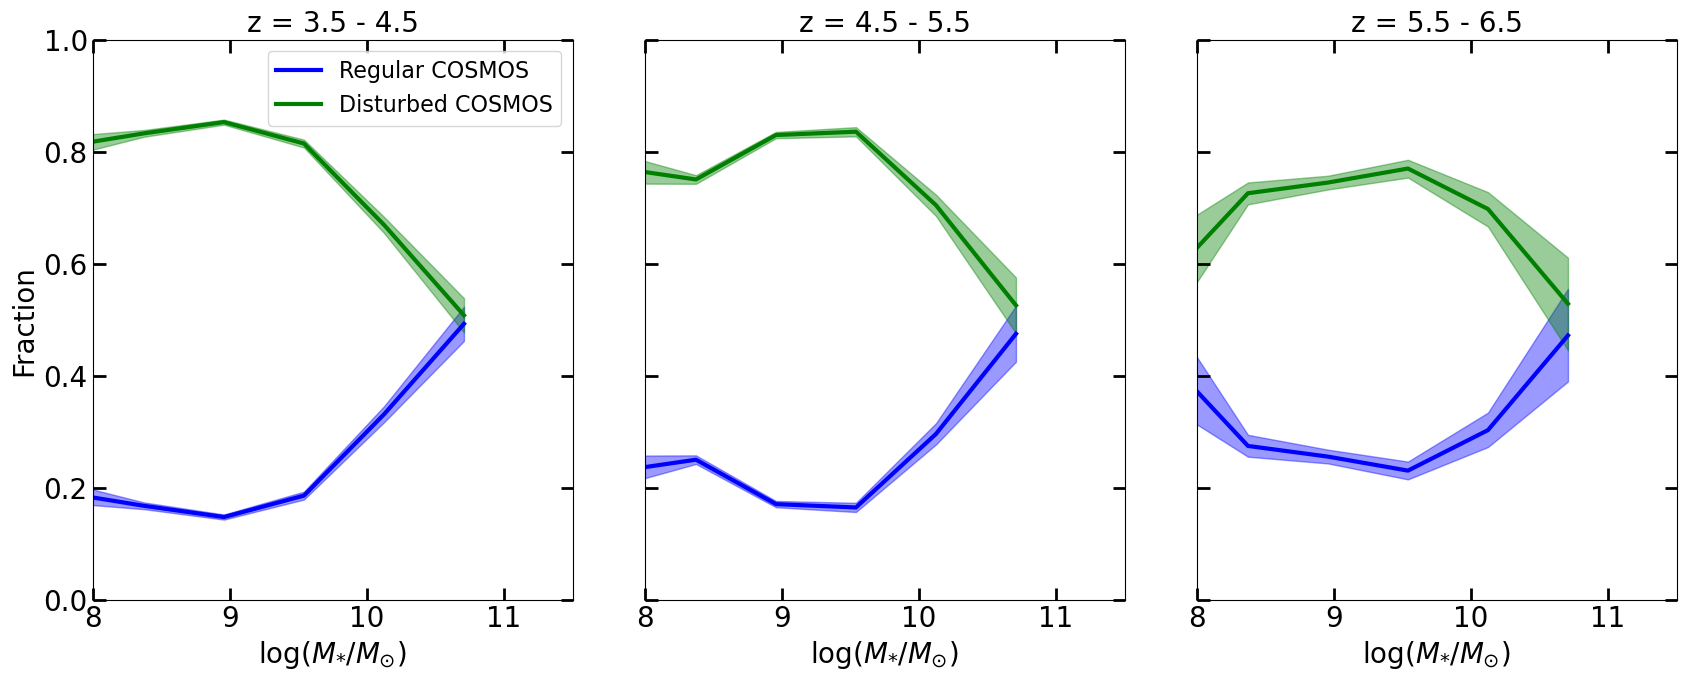

In [188]:
import matplotlib.pyplot as plt
import numpy as np

zbins = [3.5,4.5,5.5,6.5]

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 8))
fig.subplots_adjust(wspace=0.05)

for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    sel = cosmos.query("LP_zPDF > " + str(zlow) + " and LP_zPDF < " + str(zup))

    filters = ['F150W','F277W','F444W']
    morph = ['sph','disk','bd','irr']
    mass = sel['LP_mass_med_PDF']
    logmstar_16 = sel['LP_mass_l68_PDF']#+sel['err_ma']
    logmstar_84 = sel['LP_mass_u68_PDF']#-sel['err_ma']
    zbest = sel['LP_zPDF']

    sample_data = {}  # Use a dictionary to store the morph_samples data
    morph_dict ={}
    for f in filters:
        
        for m in morph:
            morph_mean = sel[f'{m}_{f}_mean']
            morph_std = sel[f'{m}_{f}_std']
    
            morph_samples=[]
            mass_samples=[]
            zbest_samples =[]
            nsamples=1
            for k in range(nsamples):
                morph_samples.append(morph_mean+np.random.normal(size=len(morph_mean))*(morph_std))
                #mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
                mass_samples.append(mass)
                zbest_samples.append(zbest)
            #print("length:", len(mass_samples))    
            sample_data[(f, m)] = morph_samples

        morph_flag=[]
        
        

        for sph,dk,irr,bd in zip(np.concatenate(sample_data[(f, 'sph')]),np.concatenate(sample_data[(f, 'disk')]),np.concatenate(sample_data[(f, 'irr')]),np.concatenate(sample_data[(f, 'bd')])):
            maxpos = np.argmax([sph,dk,irr,bd])
            
            morph_flag.append(maxpos)
        morph_dict[f]=morph_flag
           



    flatten_mass = np.concatenate(mass_samples).ravel()
    flatten_z = np.concatenate(zbest_samples).ravel()
    morph_flag = np.array(morph_dict[('F150W')])
    print('shape',np.array(flatten_z).shape)
    

    morph_f356 = np.array(morph_dict['F277W'])
    morph_f444 = np.array(morph_dict['F444W'])
    morph_flag[(flatten_z>1) & (flatten_z<3)] = morph_f356[(flatten_z>1) & (flatten_z<3)]
    morph_flag[(flatten_z>3) & (flatten_z<6)]= morph_f444[(flatten_z>3) & (flatten_z<6)]

    axs[i].set_ylim(0, 1)
    axs[i].set_xlim(8, 11.5)
    axs[i].set_xticks(np.arange(8, 12))
    axs[i].tick_params(axis='both', which='major', labelsize=20)
    axs[i].set_xlabel(r'$\log(M_{*}/M_{\odot})$', fontsize=20)
    axs[i].set_title(f"z = {zlow} - {zup}", fontsize=20)
    axs[i].tick_params(axis='both', which='major', width = 2, length = 9, direction='in', top = 1, right = 1)

    axs[0].set_ylabel(r'Fraction', fontsize=20)


  


    all,bins = np.histogram(flatten_mass,range=(7.5,11),bins=6)
    sph,bins = np.histogram(flatten_mass[(morph_flag==0)|(morph_flag==3)| (morph_flag==1)],range=(7.5,11),bins=6)
    dk,bins = np.histogram(flatten_mass[(morph_flag==2)],range=(7.5,11),bins=6)

    bcenters = (bins[1:] + bins[:-1])/2

    axs[i].plot(bcenters,betaincinv(sph+1, all+1-sph, 0.5),color='blue',linewidth=3,label="Regular COSMOS")
    axs[i].fill_between(bcenters, betaincinv(sph/nsamples+1, all/nsamples+1-sph/nsamples, .16), betaincinv(sph/nsamples+1, all/nsamples+1-sph/nsamples, .84), color='blue', alpha=0.4)
    axs[i].plot(bcenters,betaincinv(dk+1, all+1-dk, 0.5),color='green',linewidth=3,label="Disturbed COSMOS")
    axs[i].fill_between(bcenters, betaincinv(dk/nsamples+1, all/nsamples+1-dk/nsamples, 0.16), betaincinv(dk/nsamples+1, all/nsamples+1-dk/nsamples, 0.84), color='green', alpha=0.4)
    axs[0].legend(fontsize=16)


    


plt.subplots_adjust(left=0.07, bottom=0.15, right=0.95, top=0.85, wspace=0.15, hspace=0.15)
#plt.savefig(data_path+"morph_frac_irr_resframe_multipanel_sample.png")

plt.show()

In [174]:
print(cosmos.sph_F444W_mean[0:1000])

0      1.161992e-13
1      2.956505e-13
2      3.333480e-07
3      3.326025e-15
4      3.597812e-11
           ...     
995    5.019523e-14
996    7.583011e-02
997    1.588371e-01
998    1.711305e-01
999    1.621441e-07
Name: sph_F444W_mean, Length: 1000, dtype: float64


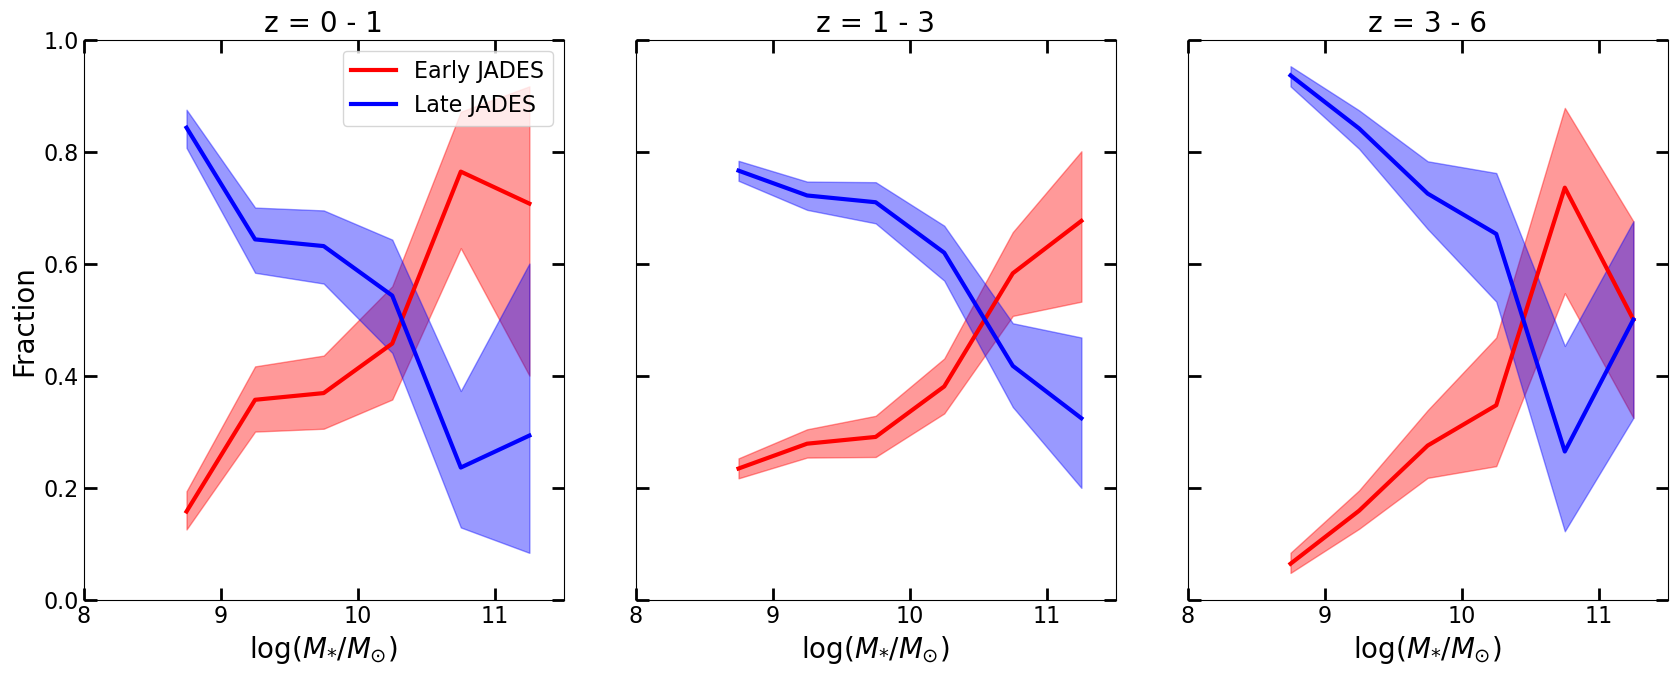

In [178]:
import matplotlib.pyplot as plt
import numpy as np

zbins = [0,1,3,6]

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 8))
fig.subplots_adjust(wspace=0.05)

for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    sel = jades.query("z > " + str(zlow) + " and z < " + str(zup))

    mass = sel['mass']
    zbest = sel["z"]
    morph_flag = sel.morph_flag_f200w.values

    morph_f356 = sel.morph_flag_f356w.values
    morph_f444 = sel.morph_flag_f444w.values
    morph_flag[(zbest>1) & (zbest<3)] = morph_f356[(zbest>1) & (zbest<3)]
    morph_flag[(zbest>3) & (zbest<6)]= morph_f444[(zbest>3) & (zbest<6)]

    axs[i].set_ylim(0, 1)
    axs[i].set_xlim(8, 11.5)
    axs[i].set_xticks(np.arange(8, 12))
    axs[i].tick_params(axis='both', which='major', labelsize=16)
    axs[i].set_xlabel(r'$\log(M_{*}/M_{\odot})$', fontsize=20)
    axs[i].set_title(f"z = {zlow} - {zup}", fontsize=20)
    axs[i].tick_params(axis='both', which='major', width = 2, length = 9, direction='in', top = 1, right = 1)

    axs[0].set_ylabel(r'Fraction', fontsize=20)

    all, bins = np.histogram(mass, range=(8.5, 11.5), bins=6)
    sph, bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)], range=(8.5, 11.5), bins=6)
    dk, bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))], range=(8.5, 11.5), bins=6)

    bcenters = (bins[1:] + bins[:-1])/2

    axs[i].plot(bcenters, betaincinv(sph+1, all+1-sph, 0.5), color='red', linewidth=3, label="Early JADES")
    axs[i].fill_between(bcenters, betaincinv(sph+1, all+1-sph, .16), betaincinv(sph+1, all+1-sph, .84), color='red', alpha=0.4)
    axs[i].plot(bcenters, betaincinv(dk+1, all+1-dk, 0.5), color='blue', linewidth=3, label="Late JADES")
    axs[i].fill_between(bcenters, betaincinv(dk+1, all+1-dk, 0.16), betaincinv(dk+1, all+1-dk, 0.84), color='blue', alpha=0.4)
    axs[0].legend(fontsize=16)


   



plt.subplots_adjust(left=0.07, bottom=0.15, right=0.95, top=0.85, wspace=0.15, hspace=0.15)
#plt.savefig(data_path+"morph_frac_restframe_early_late_multipanel.png")

plt.show()

shape (14069,)
shape (15043,)
shape (10673,)


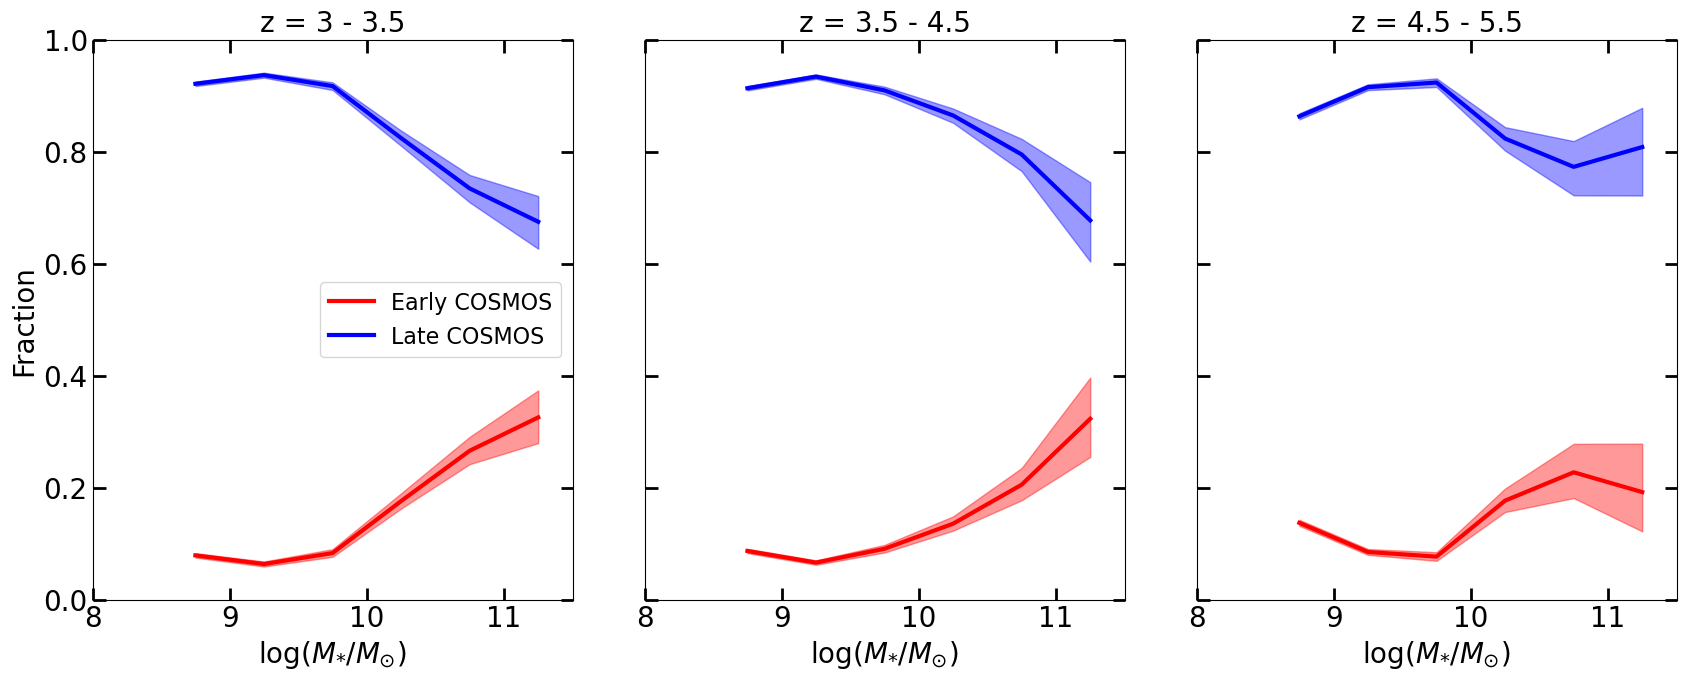

In [186]:
import matplotlib.pyplot as plt
import numpy as np

zbins = [3,3.5,4.5,5.5]
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 8))
fig.subplots_adjust(wspace=0.05)

for i, (zlow, zup) in enumerate(zip(zbins[:-1], zbins[1:])):
    sel = cosmos.query("LP_zPDF > " + str(zlow) + " and LP_zPDF < " + str(zup))

    filters = ['F150W','F277W','F444W']
    morph = ['sph','disk','bd','irr']
    mass = sel['LP_mass_med_PDF']
    logmstar_16 = sel['LP_mass_l68_PDF']#+sel['err_ma']
    logmstar_84 = sel['LP_mass_u68_PDF']#-sel['err_ma']
    zbest = sel['LP_zPDF']

    sample_data = {}  # Use a dictionary to store the morph_samples data
    morph_dict ={}
    for f in filters:
        
        for m in morph:
            morph_mean = sel[f'{m}_{f}_mean']
            morph_std = sel[f'{m}_{f}_std']
    
            morph_samples=[]
            mass_samples=[]
            zbest_samples =[]
            nsamples=1
            for k in range(nsamples):
                morph_samples.append(morph_mean+np.random.normal(size=len(morph_mean))*(morph_std))
                #mass_samples.append(mass+np.random.normal(size=len(mass))*(logmstar_84-logmstar_16))
                mass_samples.append(mass)
                zbest_samples.append(zbest)
            #print("length:", len(mass_samples))    
            sample_data[(f, m)] = morph_samples

        morph_flag=[]
        
        

        for sph,dk,irr,bd in zip(np.concatenate(sample_data[(f, 'sph')]),np.concatenate(sample_data[(f, 'disk')]),np.concatenate(sample_data[(f, 'irr')]),np.concatenate(sample_data[(f, 'bd')])):
            maxpos = np.argmax([sph,dk,irr,bd])
            
            morph_flag.append(maxpos)
        morph_dict[f]=morph_flag
           



    flatten_mass = np.concatenate(mass_samples).ravel()
    flatten_z = np.concatenate(zbest_samples).ravel()
    morph_flag = np.array(morph_dict[('F150W')])
    print('shape',np.array(flatten_z).shape)
    

    morph_f356 = np.array(morph_dict['F277W'])
    morph_f444 = np.array(morph_dict['F444W'])
    morph_flag[(flatten_z>1) & (flatten_z<3)] = morph_f356[(flatten_z>1) & (flatten_z<3)]
    morph_flag[(flatten_z>3) & (flatten_z<6)]= morph_f444[(flatten_z>3) & (flatten_z<6)]

    axs[i].set_ylim(0, 1)
    axs[i].set_xlim(8, 11.5)
    axs[i].set_xticks(np.arange(8, 12))
    axs[i].tick_params(axis='both', which='major', labelsize=20)
    axs[i].set_xlabel(r'$\log(M_{*}/M_{\odot})$', fontsize=20)
    axs[i].set_title(f"z = {zlow} - {zup}", fontsize=20)
    axs[i].tick_params(axis='both', which='major', width = 2, length = 9, direction='in', top = 1, right = 1)

    axs[0].set_ylabel(r'Fraction', fontsize=20)


  


    all, bins = np.histogram(mass, range=(8.5, 11.5), bins=6)
    sph, bins = np.histogram(mass[(morph_flag==0)|(morph_flag==3)], range=(8.5, 11.5), bins=6)
    dk, bins = np.histogram(mass[((morph_flag==1) |(morph_flag==2))], range=(8.5, 11.5), bins=6)

    bcenters = (bins[1:] + bins[:-1])/2

    axs[i].plot(bcenters, betaincinv(sph+1, all+1-sph, 0.5), color='red', linewidth=3, label="Early COSMOS")
    axs[i].fill_between(bcenters, betaincinv(sph+1, all+1-sph, .16), betaincinv(sph+1, all+1-sph, .84), color='red', alpha=0.4)
    axs[i].plot(bcenters, betaincinv(dk+1, all+1-dk, 0.5), color='blue', linewidth=3, label="Late COSMOS")
    axs[i].fill_between(bcenters, betaincinv(dk/nsamples+1, all/nsamples+1-dk/nsamples, 0.16), betaincinv(dk/nsamples+1, all/nsamples+1-dk/nsamples, 0.84), color='blue', alpha=0.4)
    axs[0].legend(fontsize=16)


    


plt.subplots_adjust(left=0.07, bottom=0.15, right=0.95, top=0.85, wspace=0.15, hspace=0.15)
#plt.savefig(data_path+"morph_frac_irr_resframe_multipanel_sample.png")

plt.show()